In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls '/content/drive/Shared drives/lightEchoes/'

model.png  star64/


In [0]:
cd '/content/drive/Shared drives/lightEchoes/'

/content/drive/Shared drives/lightEchoes


In [0]:
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sn

import cv2
import glob

import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# plot setup
pl.rcParams['lines.linewidth'] = 1.0


### prep dataset

skip to load dataset if already saved

In [0]:
imgfiles_nostar = glob.glob('star64/nostar/*.jpg')
imgfiles_star = glob.glob('star64/star/*.jpg')
imgfiles_LEs = glob.glob('star64/LEs/*.jpg')


In [0]:
N = [len(imgfiles_nostar), len(imgfiles_star), len(imgfiles_LEs)]
N

[1127, 1359, 1168]

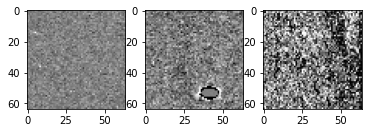

In [0]:
# show some images
img0 = cv2.imread(imgfiles_nostar[1])
img1 = cv2.imread(imgfiles_star[1])
img2 = cv2.imread(imgfiles_LEs[1])

fig, axs = pl.subplots(nrows=1, ncols=3, )

axs[0].imshow(img0)
axs[1].imshow(img1)
axs[2].imshow(img2)


In [0]:
img0.shape

(64, 64, 3)

In [0]:
def stack_imgs(imgfiles, imgshape=[64, 64, 3]):
    """stack image as numpy array """
    N_imgs = len(imgfiles)
    imgarr = np.zeros([N_imgs, imgshape[0], imgshape[1], imgshape[2]], dtype=np.uint8)
    for i, imf in enumerate( imgfiles):  
        imgarr[i] = np.asarray( cv2.imread( imf ))
        print('imread ', i, '/', N_imgs,  imf)
    return imgarr


In [0]:
# stack all images as numpy array uint8
imgs_nostar = stack_imgs(imgfiles_nostar) 
imgs_star = stack_imgs(imgfiles_star) 
imgs_LEs = stack_imgs(imgfiles_LEs) 

imread  0 / 1127 star64/nostar/23_52.jpg
imread  1 / 1127 star64/nostar/21_57.jpg
imread  2 / 1127 star64/nostar/23_136.jpg
imread  3 / 1127 star64/nostar/23_14.jpg
imread  4 / 1127 star64/nostar/20_95.jpg
imread  5 / 1127 star64/nostar/23_29.jpg
imread  6 / 1127 star64/nostar/23_61.jpg
imread  7 / 1127 star64/nostar/23_107.jpg
imread  8 / 1127 star64/nostar/25_104 (1).jpg
imread  9 / 1127 star64/nostar/25_27 (1).jpg
imread  10 / 1127 star64/nostar/25_104.jpg
imread  11 / 1127 star64/nostar/25_33 (1).jpg
imread  12 / 1127 star64/nostar/25_33.jpg
imread  13 / 1127 star64/nostar/25_105 (1).jpg
imread  14 / 1127 star64/nostar/25_105.jpg
imread  15 / 1127 star64/nostar/25_27.jpg
imread  16 / 1127 star64/nostar/31_39 (1).jpg
imread  17 / 1127 star64/nostar/31_39.jpg
imread  18 / 1127 star64/nostar/32_92 (1).jpg
imread  19 / 1127 star64/nostar/31_38 (1).jpg
imread  20 / 1127 star64/nostar/31_38.jpg
imread  21 / 1127 star64/nostar/32_13 (1).jpg
imread  22 / 1127 star64/nostar/32_13.jpg
imread

In [0]:
imgs_nostar.shape, imgs_star.shape, imgs_LEs.shape

((1127, 64, 64, 3), (1359, 64, 64, 3), (1168, 64, 64, 3))

Text(0.5, 1.0, 'light echo')

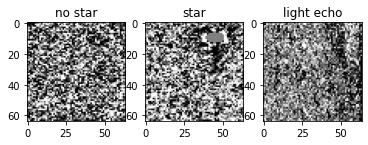

In [0]:
# show some images
fig, axs = pl.subplots(nrows=1, ncols=3, )

axs[0].imshow(imgs_nostar[3, :])
axs[0].set_title('no star')
axs[1].imshow(imgs_star[3, :])
axs[1].set_title('star')

axs[2].imshow(imgs_LEs[3, :])
axs[2].set_title('light echo')


In [0]:
# create labels
# nostar 0, star 1, light echo 2

y_nostar = np.zeros( (N[0], 1) )
y_star = np.ones( (N[1], 1) ) 
y_LEs = np.ones( (N[2], 1) ) * 2

In [0]:
X = np.concatenate( (imgs_nostar, imgs_star, imgs_LEs),  axis=0 ) [:,:,:,0] # select the first channel only
X.shape

(3654, 64, 64)

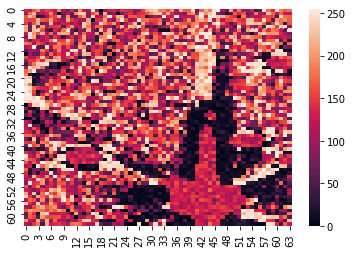

In [0]:
sn.heatmap(X[1400,:, :])

In [0]:
Y = np.concatenate( (y_nostar, y_star, y_LEs),  axis=0 )
Y.shape

(3654, 1)

### load data

In [0]:
# save X, Y to npz
# np.savez('./star64/imgsXY3654.npz', X=X, Y=Y)

imgsXY = np.load('./star64/imgsXY3654.npz')
X = imgsXY['X']
Y = imgsXY['Y']

split train and test

In [0]:
# shuffle and split 
from sklearn.model_selection import train_test_split

Xn = X / 255.  # normalize 
X_train, X_test, y_train, y_test = train_test_split(Xn, Y, test_size=0.33, shuffle=True, random_state=42)

# create a validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, shuffle=True, random_state=43)



In [0]:
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

(((1640, 64, 64), (1640, 1)),
 ((808, 64, 64), (808, 1)),
 ((1206, 64, 64), (1206, 1)))

In [0]:
np.unique(y_train, return_counts=True)

(array([0., 1., 2.]), array([485, 609, 546]))

In [0]:
# one hot encoding the labels
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)


In [0]:
y_train_onehot.shape, y_val_onehot.shape, y_test_onehot.shape, 

((1640, 3), (808, 3), (1206, 3))

In [0]:
y_train_onehot[0, :]

array([0., 1., 0.], dtype=float32)

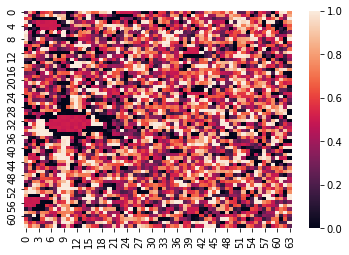

In [0]:
sn.heatmap(X_train[0, :, :])

### Building models

#### simple neural network

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(64, 64, 1)),
                         #keras.layers.Dense(1024, activation=tf.nn.relu),  
                         # keras.layers.Dense(256, activation=tf.nn.relu),
                         #keras.layers.Dense(512, activation=tf.nn.relu), 
                         keras.layers.Dense(256, activation=tf.nn.relu), 
                         keras.layers.Dense(128, activation=tf.nn.relu), 
                         keras.layers.Dense(64, activation=tf.nn.relu), 
                         keras.layers.Dense(32, activation=tf.nn.relu),
                         keras.layers.Dense(16, activation=tf.nn.relu),
                         keras.layers.Dense(8, activation=tf.nn.relu),
                         keras.layers.Dense(3, activation=tf.nn.sigmoid) ])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1048832   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 1

In [0]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


In [0]:
X_train.shape

(990, 64, 64, 3)

In [0]:
history = model.fit(X_train[:,:,:,1].reshape(X_train.shape[0], 64, 64, 1), y_train_onehot, epochs=15)


Epoch 1/15
31/31 [==============================] - 0s 5ms/step - loss: 1.0993 - accuracy: 0.3434
Epoch 2/15
31/31 [==============================] - 0s 4ms/step - loss: 1.0938 - accuracy: 0.3434
Epoch 3/15
31/31 [==============================] - 0s 4ms/step - loss: 1.0854 - accuracy: 0.3758
Epoch 4/15
31/31 [==============================] - 0s 5ms/step - loss: 1.0674 - accuracy: 0.4414
Epoch 5/15
31/31 [==============================] - 0s 4ms/step - loss: 1.0515 - accuracy: 0.4657
Epoch 6/15
31/31 [==============================] - 0s 5ms/step - loss: 1.0159 - accuracy: 0.4707
Epoch 7/15
31/31 [==============================] - 0s 5ms/step - loss: 0.9506 - accuracy: 0.5525
Epoch 8/15
31/31 [==============================] - 0s 4ms/step - loss: 0.9055 - accuracy: 0.5556
Epoch 9/15
31/31 [==============================] - 0s 4ms/step - loss: 0.8358 - accuracy: 0.6222
Epoch 10/15
31/31 [==============================] - 0s 5ms/step - loss: 0.7688 - accuracy: 0.6313
Epoch 11/15
31/31 [

In [0]:
df_history = pd.DataFrame(history.history)
df_history

,loss,accuracy
0,1.099313,0.343434
1,1.093790,0.343434
2,1.085382,0.375758
3,1.067410,0.441414
4,1.051470,0.465657
5,1.015948,0.470707
6,0.950641,0.552525
7,0.905505,0.555556
8,0.835831,0.622222
9,0.768786,0.631313


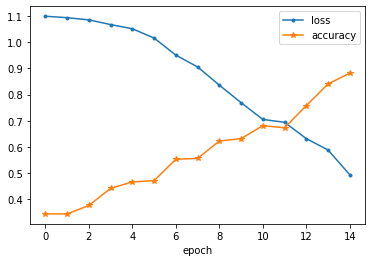

In [0]:
pl.plot(df_history.loss, '.-', label='loss')
pl.plot(df_history.accuracy, '*-', label='accuracy')
pl.xlabel('epoch')
pl.legend()

In [0]:
np.unique( y_test, return_counts=True )

(array([0., 1., 2.]), array([167, 178, 144]))

In [0]:
# evaulate model
test_loss, test_acc = model.evaluate(X_test[:,:,:,1].reshape( X_test.shape[0], 64, 64, 1 ), y_test_onehot)


16/16 [==============================] - 0s 3ms/step - loss: 1.1502 - accuracy: 0.4315


#### Convolutional 2D model

In [0]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [0]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)


In [0]:
#create model
model_cnn = keras.Sequential()
#add model layers

model_cnn.add(Conv2D(8, kernel_size=3, padding='same', activation='relu', input_shape=(64,64,1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Flatten())
model_cnn.add(Dense(units = 16, activation = 'relu'))
model_cnn.add(Dense(3, activation='sigmoid'))

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

In [0]:
# keras.utils.plot_model(model_cnn, show_shapes=True, rankdir='TB')

In [0]:
model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


In [0]:
history_cnn = model_cnn.fit(X_train, y_train_onehot, epochs=100, validation_data=(X_val, y_val_onehot))


Epoch 1/100
52/52 [==============================] - 0s 9ms/step - loss: 1.0985 - accuracy: 0.3665 - val_loss: 1.0937 - val_accuracy: 0.3899
Epoch 2/100
52/52 [==============================] - 0s 5ms/step - loss: 1.0953 - accuracy: 0.3713 - val_loss: 1.0917 - val_accuracy: 0.3899
Epoch 3/100
52/52 [==============================] - 0s 5ms/step - loss: 1.0937 - accuracy: 0.3713 - val_loss: 1.0921 - val_accuracy: 0.3899
Epoch 4/100
52/52 [==============================] - 0s 5ms/step - loss: 1.0921 - accuracy: 0.3713 - val_loss: 1.0771 - val_accuracy: 0.3899
Epoch 5/100
52/52 [==============================] - 0s 5ms/step - loss: 0.9948 - accuracy: 0.4659 - val_loss: 0.9001 - val_accuracy: 0.5755
Epoch 6/100
52/52 [==============================] - 0s 5ms/step - loss: 0.8567 - accuracy: 0.5774 - val_loss: 0.7970 - val_accuracy: 0.6114
Epoch 7/100
52/52 [==============================] - 0s 5ms/step - loss: 0.7748 - accuracy: 0.6183 - val_loss: 0.7291 - val_accuracy: 0.6374
Epoch 8/100
5

In [0]:
# evaulate model
test_loss, test_acc = model_cnn.evaluate(X_test, y_test_onehot)


38/38 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9925


In [0]:
plot_score(history_cnn)

NameError: ignored

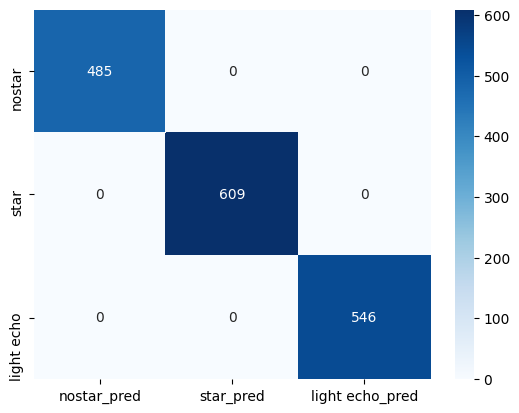

In [0]:
plot_cm(model_cnn, X_train, y_train)

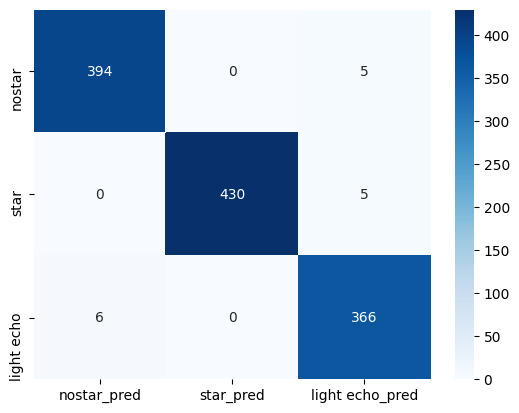

In [0]:
plot_cm(model_cnn, X_test, y_test)

explore model weight

In [0]:
model_cnn.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 64, 64, 8)         80        
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 32)      

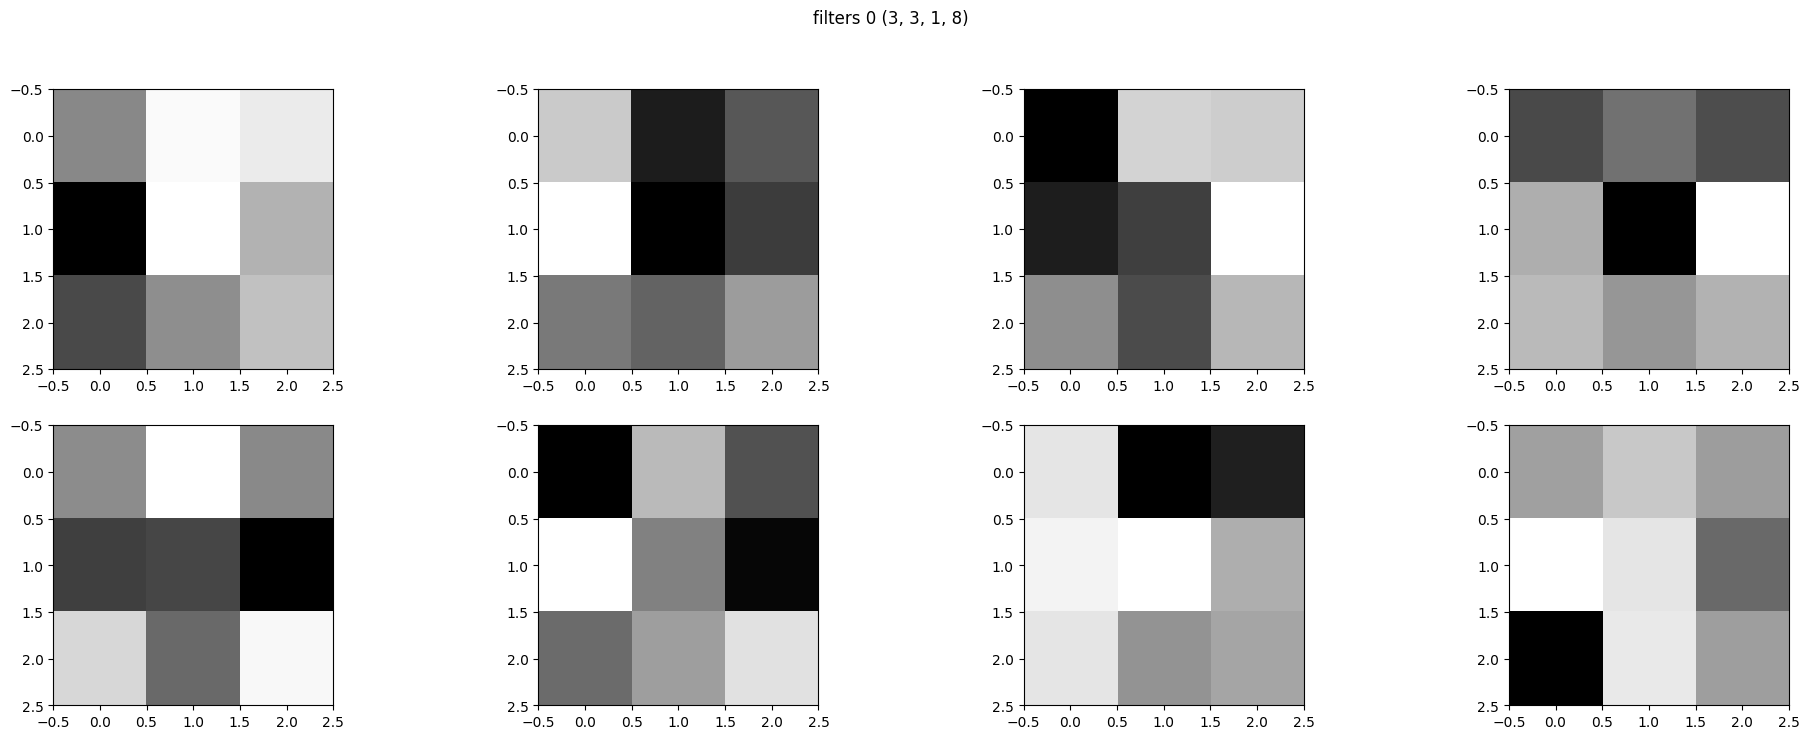

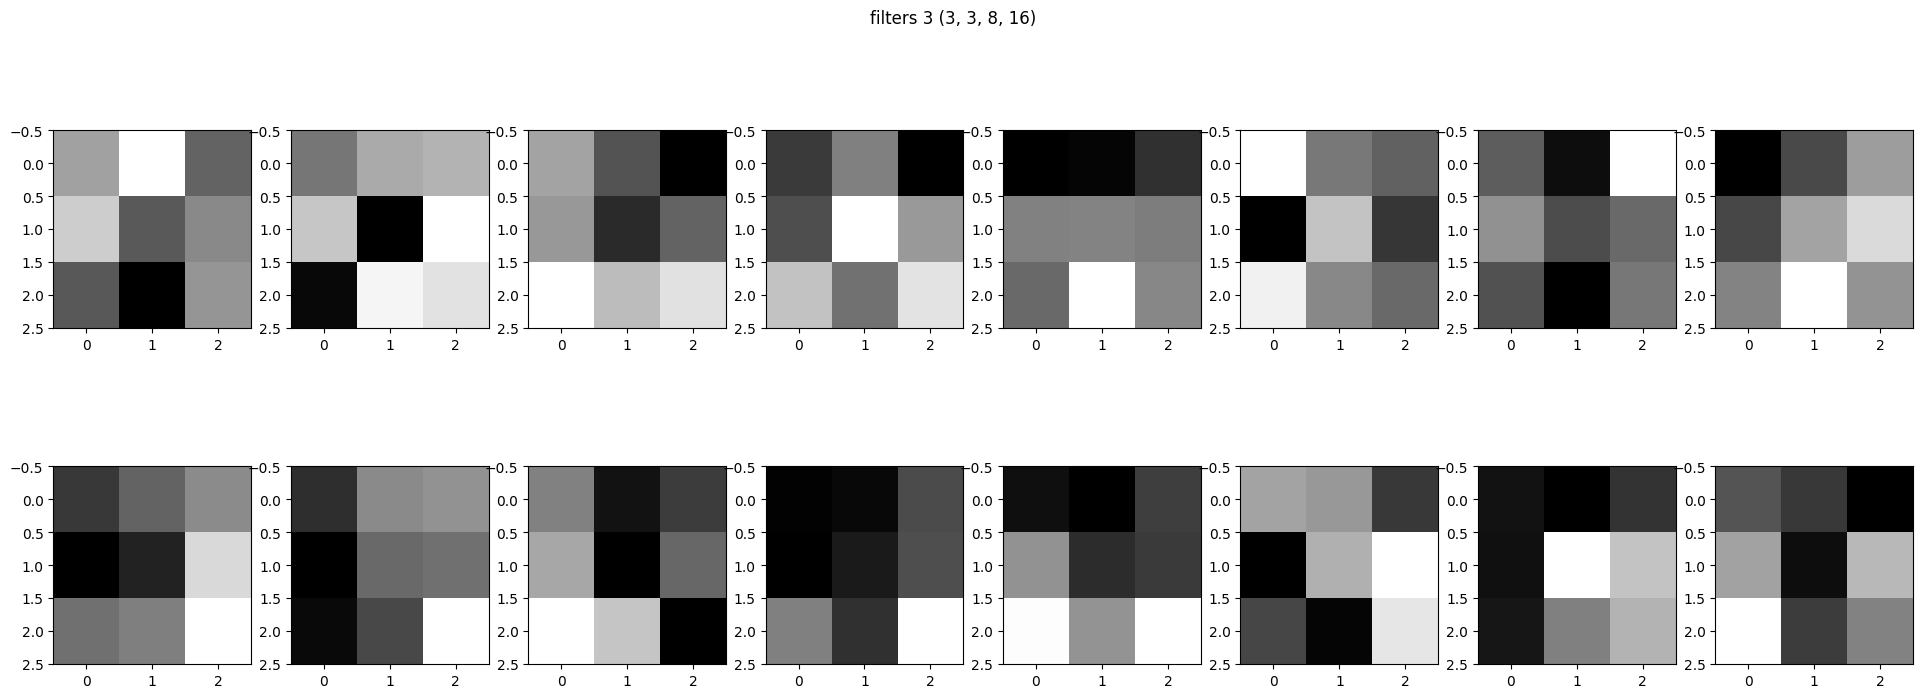

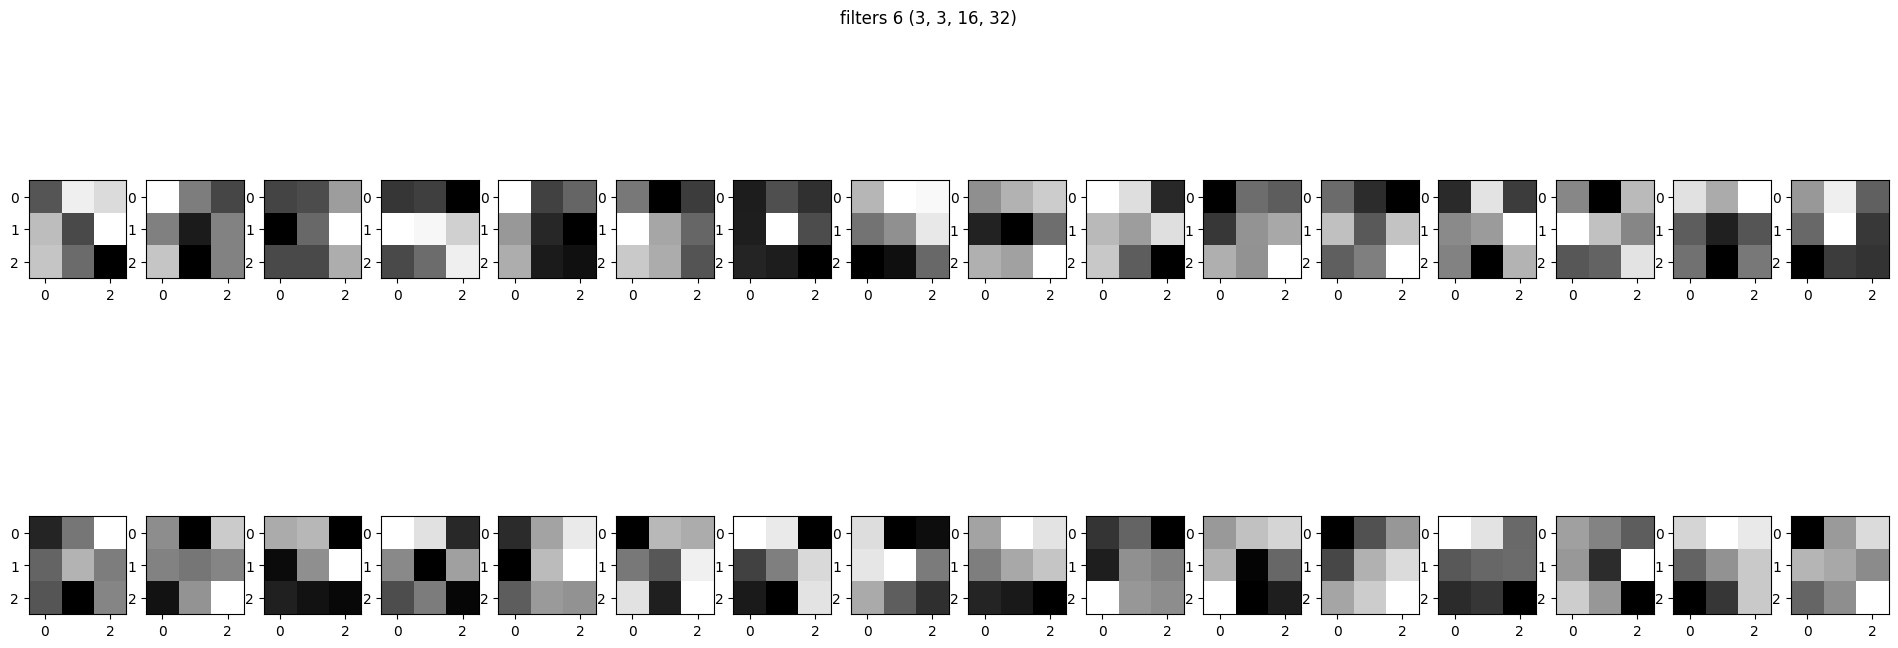

In [0]:
plot_filters(0)
plot_filters(3)
plot_filters(6)


extract features

In [0]:
extractor = keras.Model(inputs=model_cnn.inputs,
                        outputs=[layer.output for layer in model_cnn.layers])


In [0]:
X.shape

(3654, 64, 64)

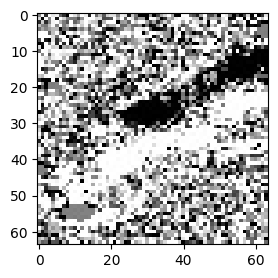

In [0]:
imgidx = 3520
img_ = X[imgidx, :, :]/255
pl.figure(figsize=(3,3))
pl.imshow(img_, cmap='gray')


In [0]:
Y[imgidx]

array([2.])

In [0]:
# predicted
np.argmax( model_cnn.predict(img_.reshape(1, 64, 64, 1)) )

2

In [0]:
features = extractor(img_.reshape(1, 64, 64, 1 ))


In [0]:
for i in range( len(features) ):
    print(i, features[i].numpy().shape)

0 (1, 64, 64, 8)
1 (1, 32, 32, 8)
2 (1, 32, 32, 8)
3 (1, 32, 32, 16)
4 (1, 16, 16, 16)
5 (1, 16, 16, 16)
6 (1, 16, 16, 32)
7 (1, 8, 8, 32)
8 (1, 8, 8, 32)
9 (1, 8, 8, 64)
10 (1, 4, 4, 64)
11 (1, 4, 4, 64)
12 (1, 1024)
13 (1, 16)
14 (1, 3)


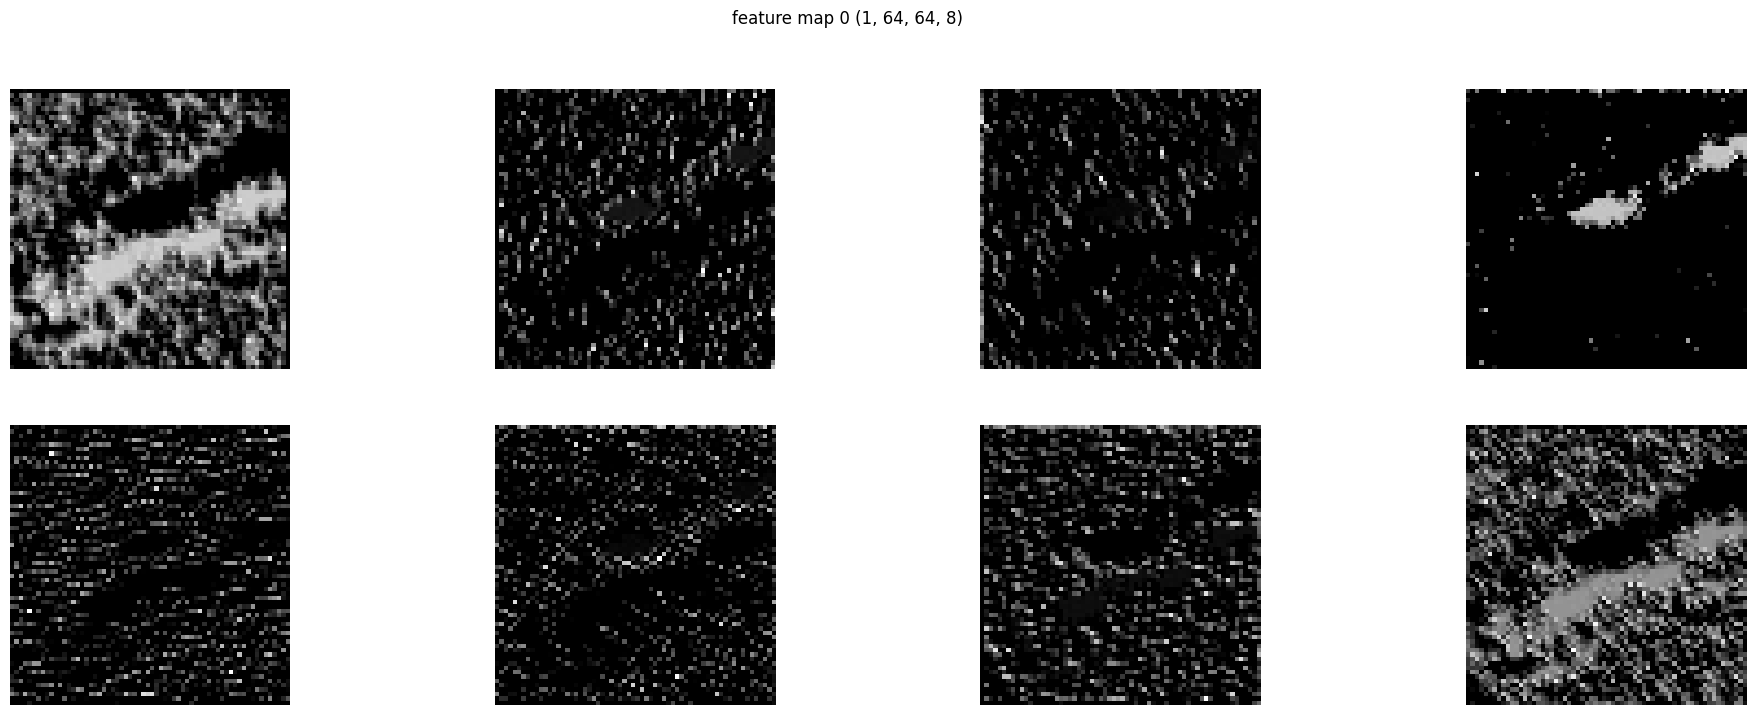

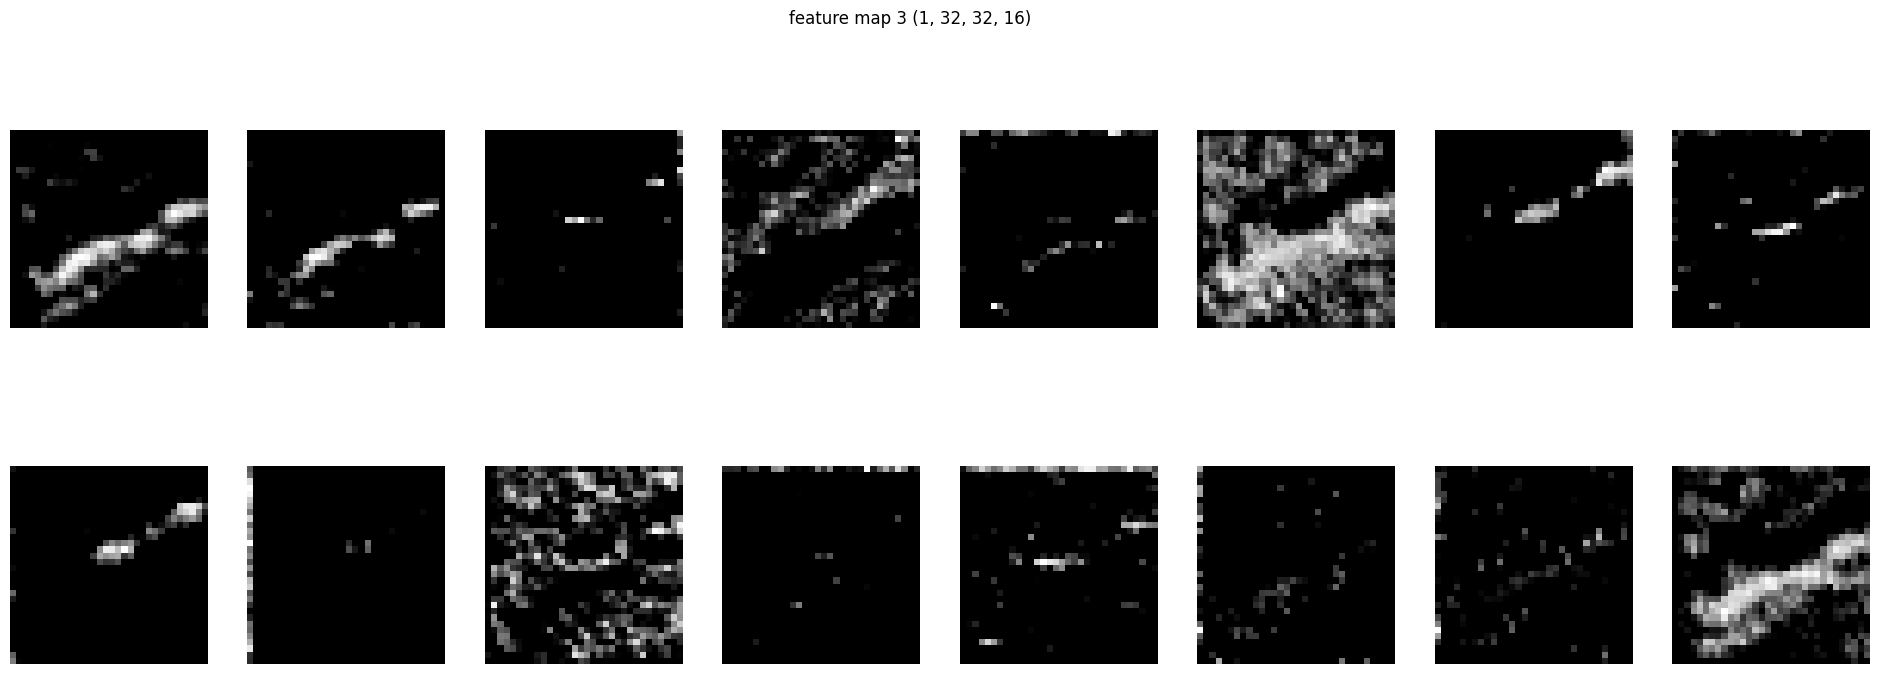

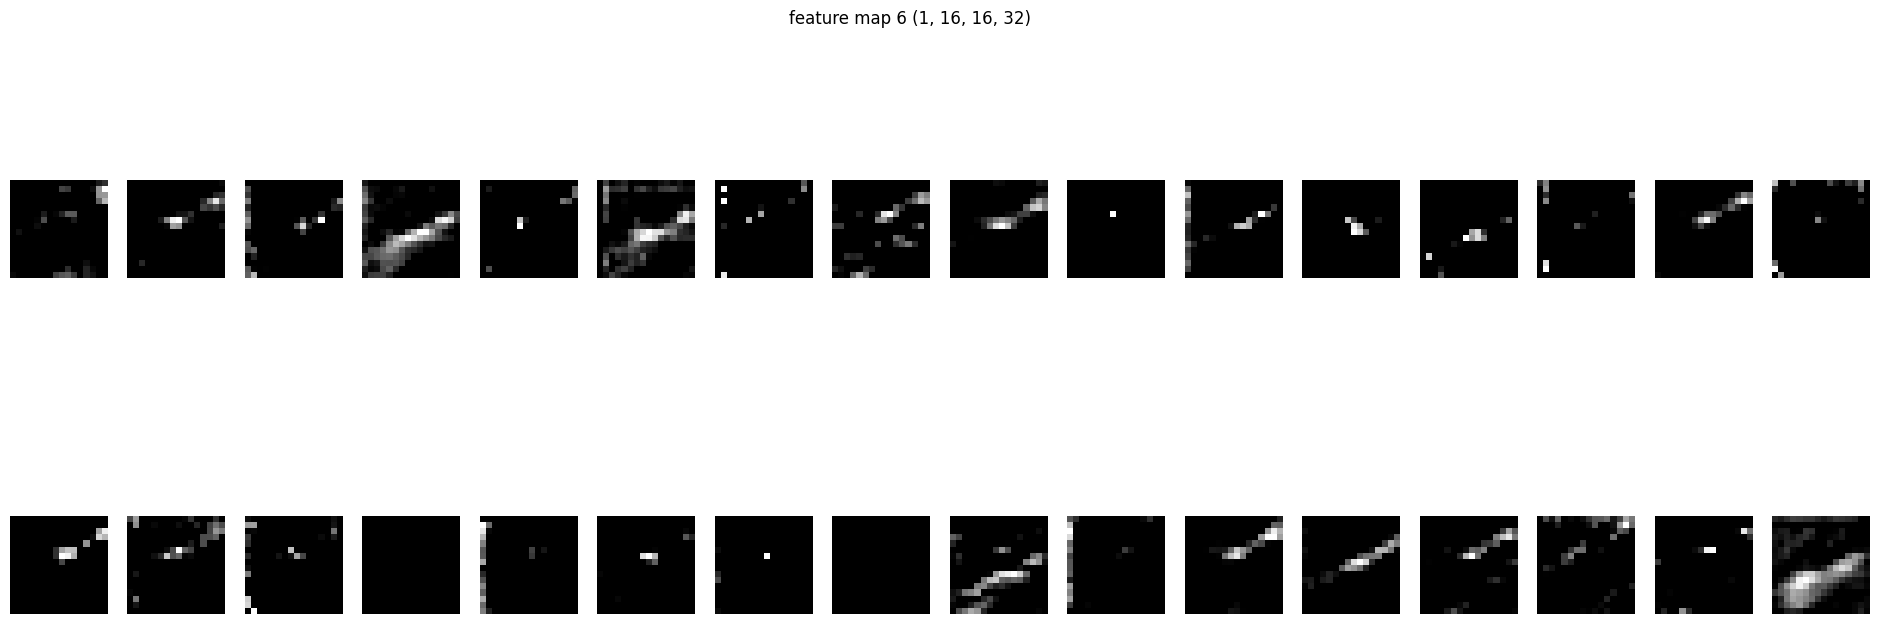

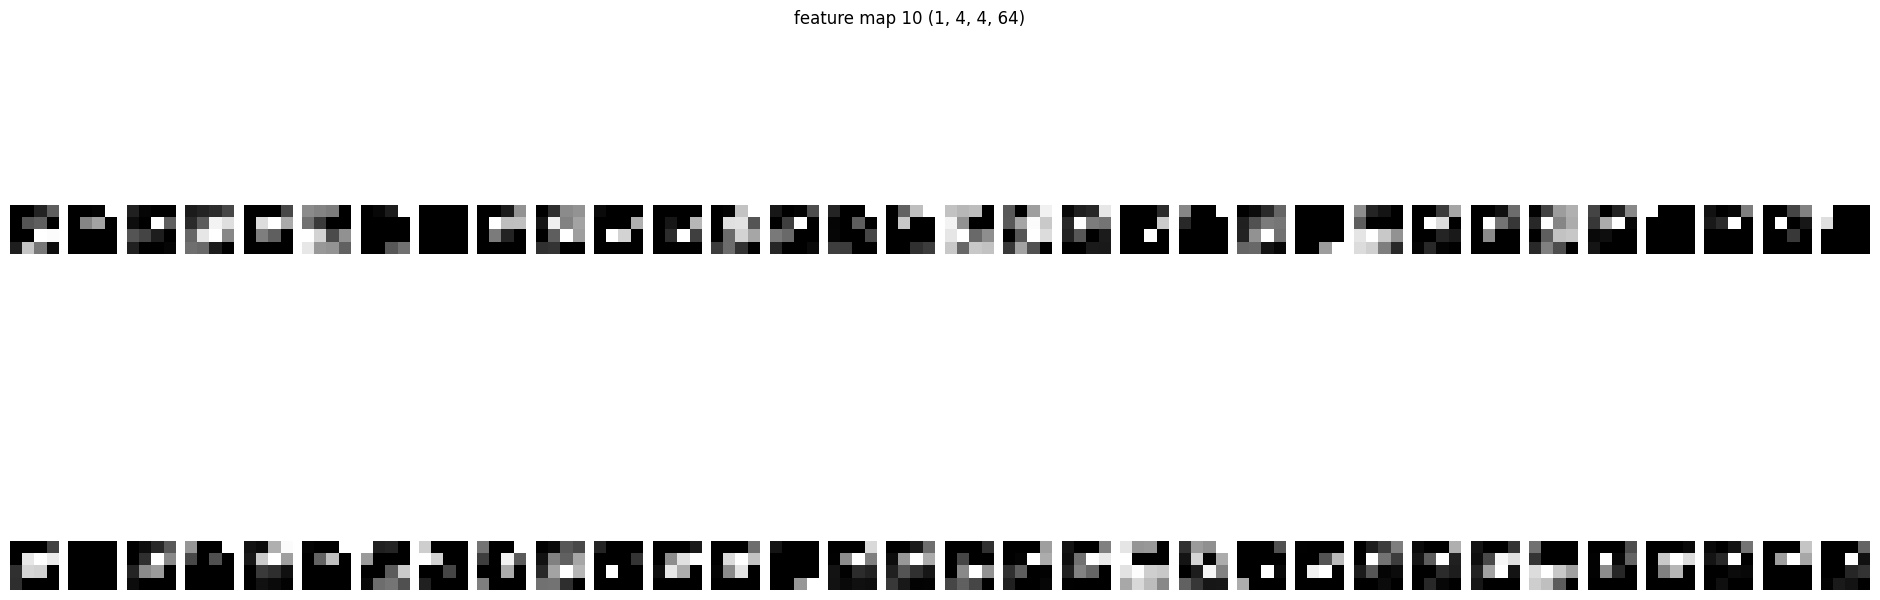

In [0]:
plot_features(layer=0)
plot_features(layer=3)
plot_features(layer=6)
plot_features(layer=10)


#### Convolutional 2D model , filter size=6

In [0]:
#create model
model_cnn = keras.Sequential()
#add model layers

model_cnn.add(Conv2D(8, kernel_size=6, padding='same', activation='relu', input_shape=(64,64,1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Conv2D(16, kernel_size=6, padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Flatten())
model_cnn.add(Dense(units = 16, activation = 'relu'))
model_cnn.add(Dense(3, activation='sigmoid'))

model_cnn.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 64, 64, 8)         296       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 16, 16, 32)      

In [0]:
# keras.utils.plot_model(model_cnn, show_shapes=True, rankdir='TB')

In [0]:
model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


In [0]:
history_cnn = model_cnn.fit(X_train, y_train_onehot, epochs=100, validation_data=(X_val, y_val_onehot))


Epoch 1/100
52/52 [==============================] - 1s 16ms/step - loss: 1.0957 - accuracy: 0.3707 - val_loss: 1.0941 - val_accuracy: 0.3899
Epoch 2/100
52/52 [==============================] - 1s 12ms/step - loss: 1.0944 - accuracy: 0.3732 - val_loss: 1.0910 - val_accuracy: 0.3899
Epoch 3/100
52/52 [==============================] - 1s 12ms/step - loss: 1.0917 - accuracy: 0.3713 - val_loss: 1.0876 - val_accuracy: 0.3899
Epoch 4/100
52/52 [==============================] - 1s 12ms/step - loss: 1.0677 - accuracy: 0.3945 - val_loss: 0.9857 - val_accuracy: 0.4406
Epoch 5/100
52/52 [==============================] - 1s 12ms/step - loss: 0.9815 - accuracy: 0.4988 - val_loss: 0.9216 - val_accuracy: 0.6200
Epoch 6/100
52/52 [==============================] - 1s 12ms/step - loss: 0.9059 - accuracy: 0.5878 - val_loss: 0.8677 - val_accuracy: 0.6077
Epoch 7/100
52/52 [==============================] - 1s 12ms/step - loss: 0.8322 - accuracy: 0.6134 - val_loss: 0.7920 - val_accuracy: 0.6349
Epoch 

In [0]:
model_cnn.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 64, 64, 8)         296       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 16, 16, 32)      

In [0]:
# evaulate model
test_loss, test_acc = model_cnn.evaluate(X_test, y_test_onehot)


38/38 [==============================] - 0s 5ms/step - loss: 0.0917 - accuracy: 0.9743


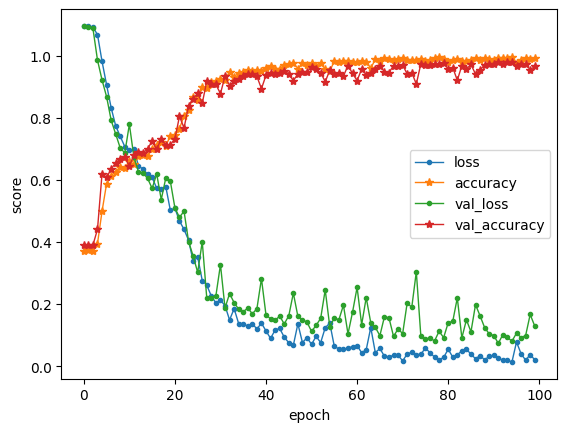

In [0]:
plot_score(history_cnn)

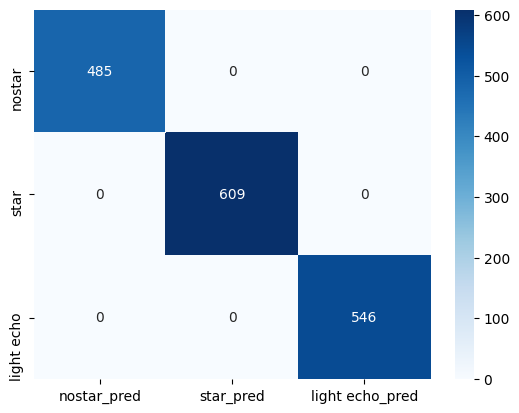

In [0]:
plot_cm(model_cnn, X_train, y_train)

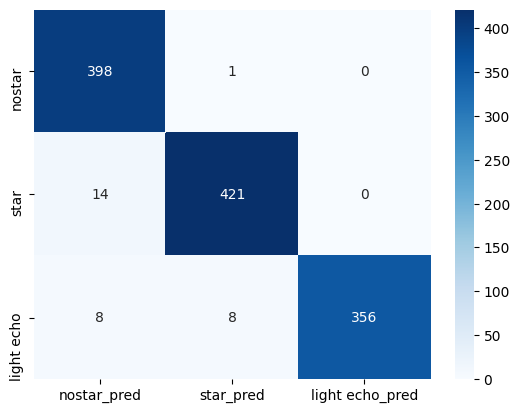

In [0]:
plot_cm(model_cnn, X_test, y_test)

explore model weight

In [0]:
model_cnn.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 64, 64, 8)         296       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 16, 16, 32)      

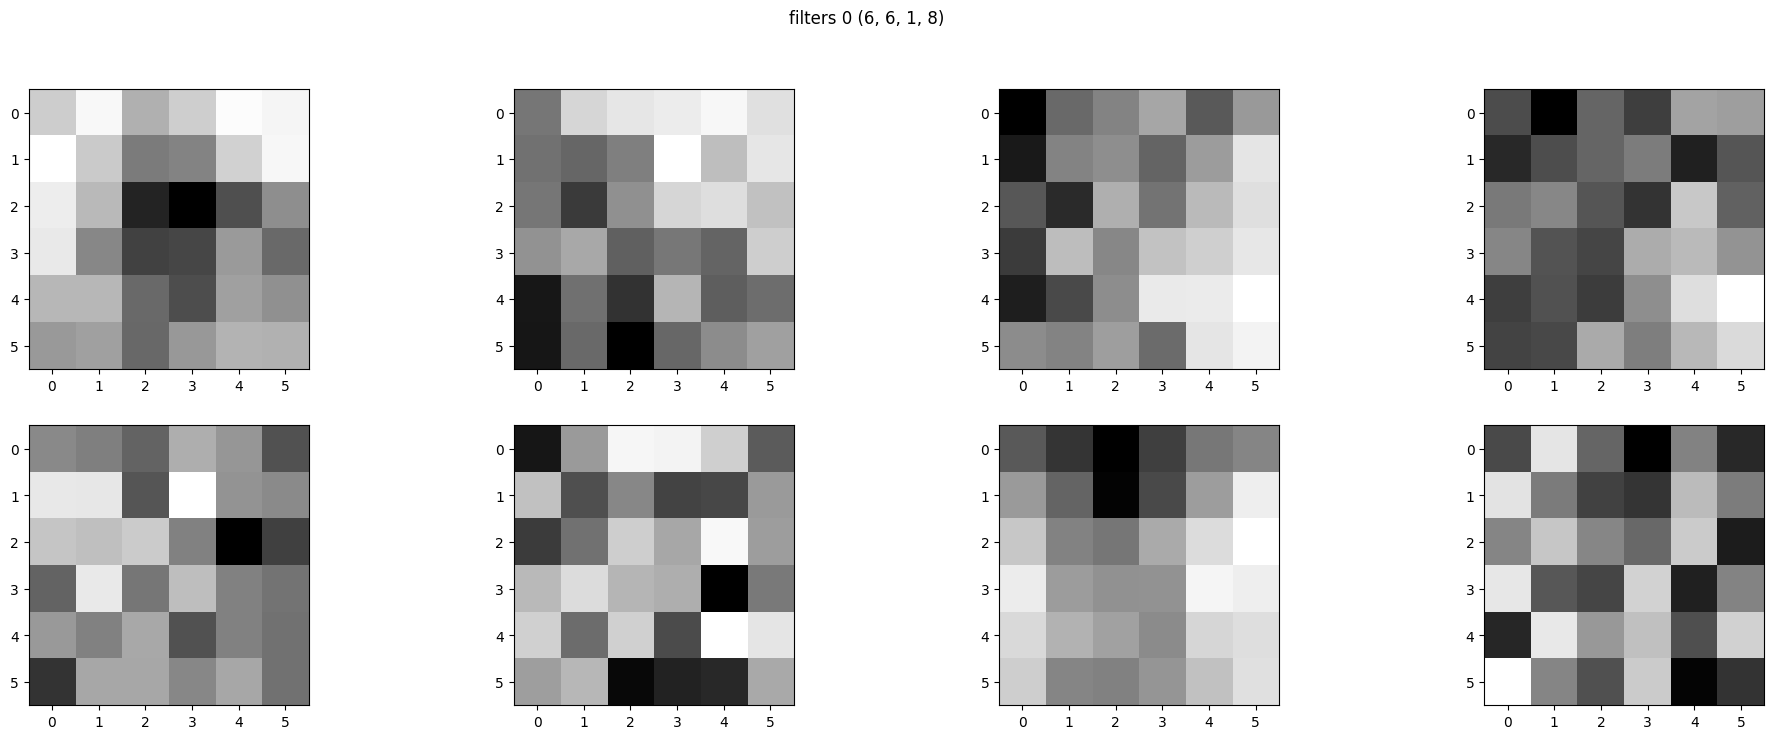

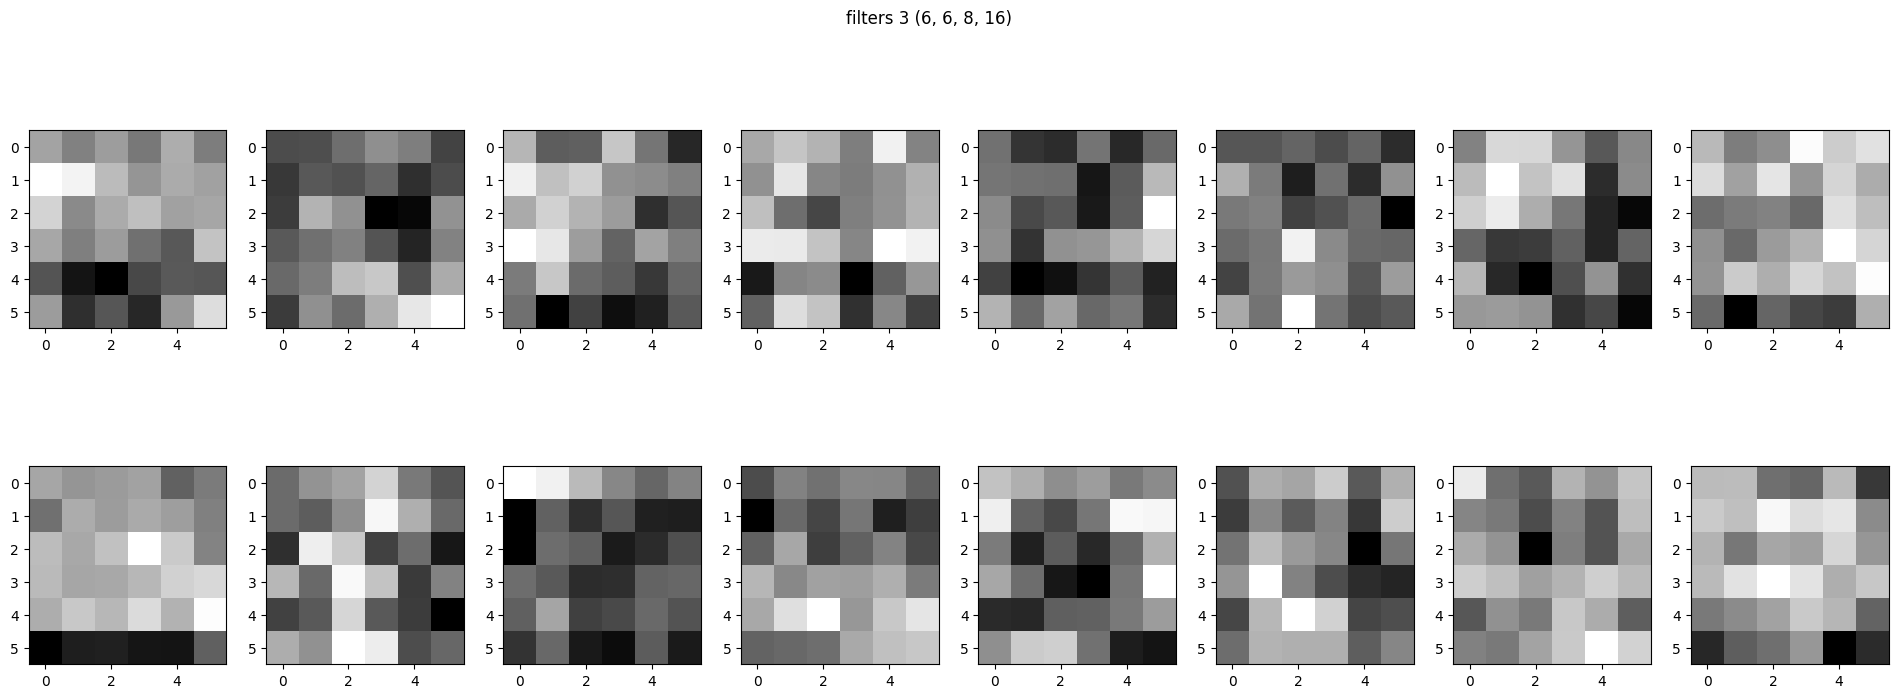

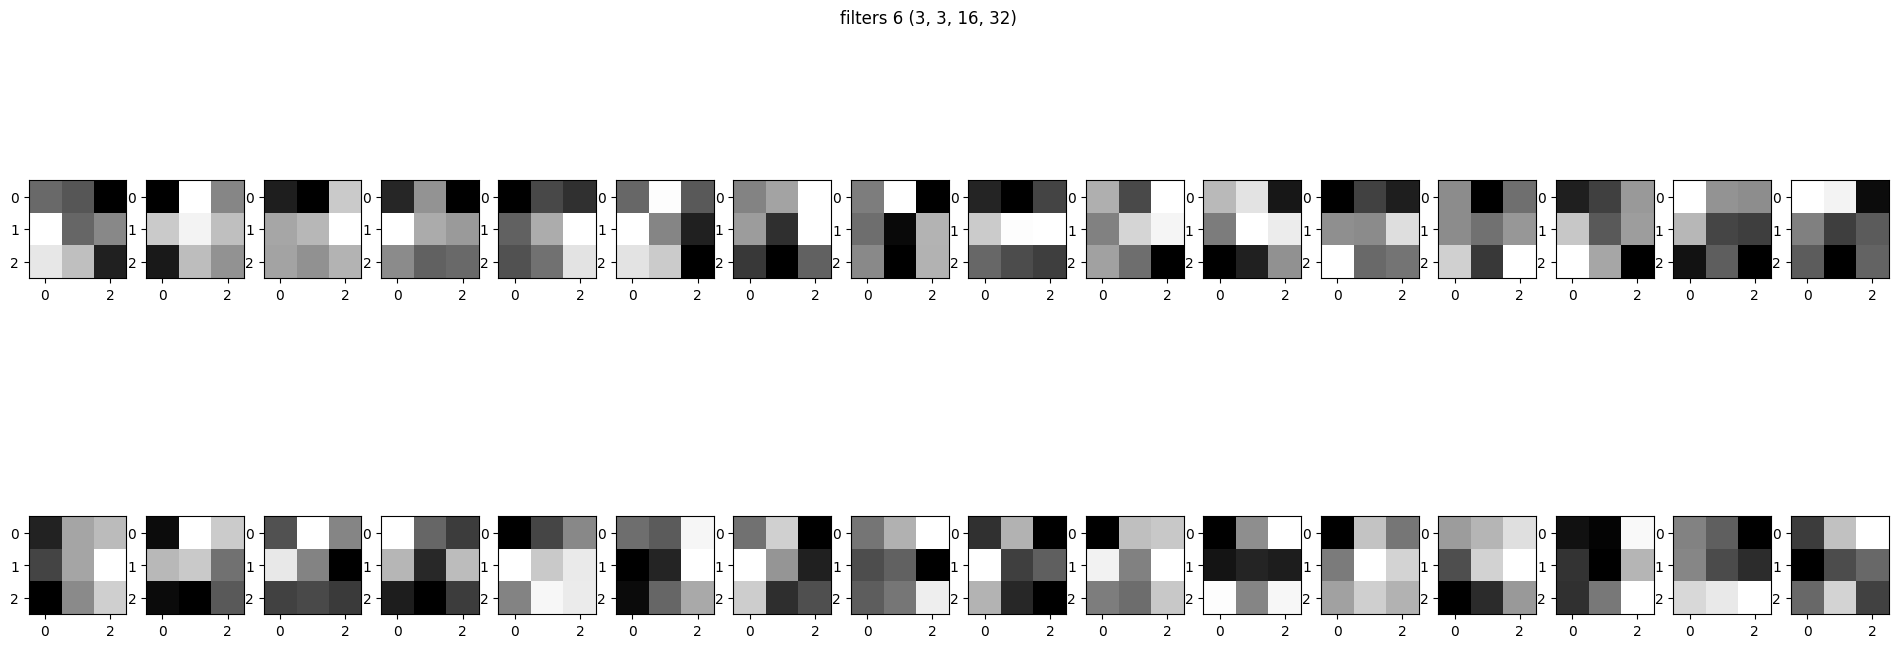

In [0]:
plot_filters(0)
plot_filters(3)
plot_filters(6)


extract features

In [0]:
extractor = keras.Model(inputs=model_cnn.inputs,
                        outputs=[layer.output for layer in model_cnn.layers])


In [0]:
X.shape

(3654, 64, 64)

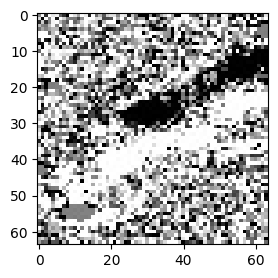

In [0]:
imgidx = 3520
img_ = X[imgidx, :, :]/255
pl.figure(figsize=(3,3))
pl.imshow(img_, cmap='gray')


In [0]:
Y[imgidx]

array([2.])

In [0]:
# predicted
np.argmax( model_cnn.predict(img_.reshape(1, 64, 64, 1)) )

2

In [0]:
features = extractor(img_.reshape(1, 64, 64, 1 ))


In [0]:
for i in range( len(features) ):
    print(i, features[i].numpy().shape)

0 (1, 64, 64, 8)
1 (1, 32, 32, 8)
2 (1, 32, 32, 8)
3 (1, 32, 32, 16)
4 (1, 16, 16, 16)
5 (1, 16, 16, 16)
6 (1, 16, 16, 32)
7 (1, 8, 8, 32)
8 (1, 8, 8, 32)
9 (1, 8, 8, 64)
10 (1, 4, 4, 64)
11 (1, 4, 4, 64)
12 (1, 1024)
13 (1, 16)
14 (1, 3)


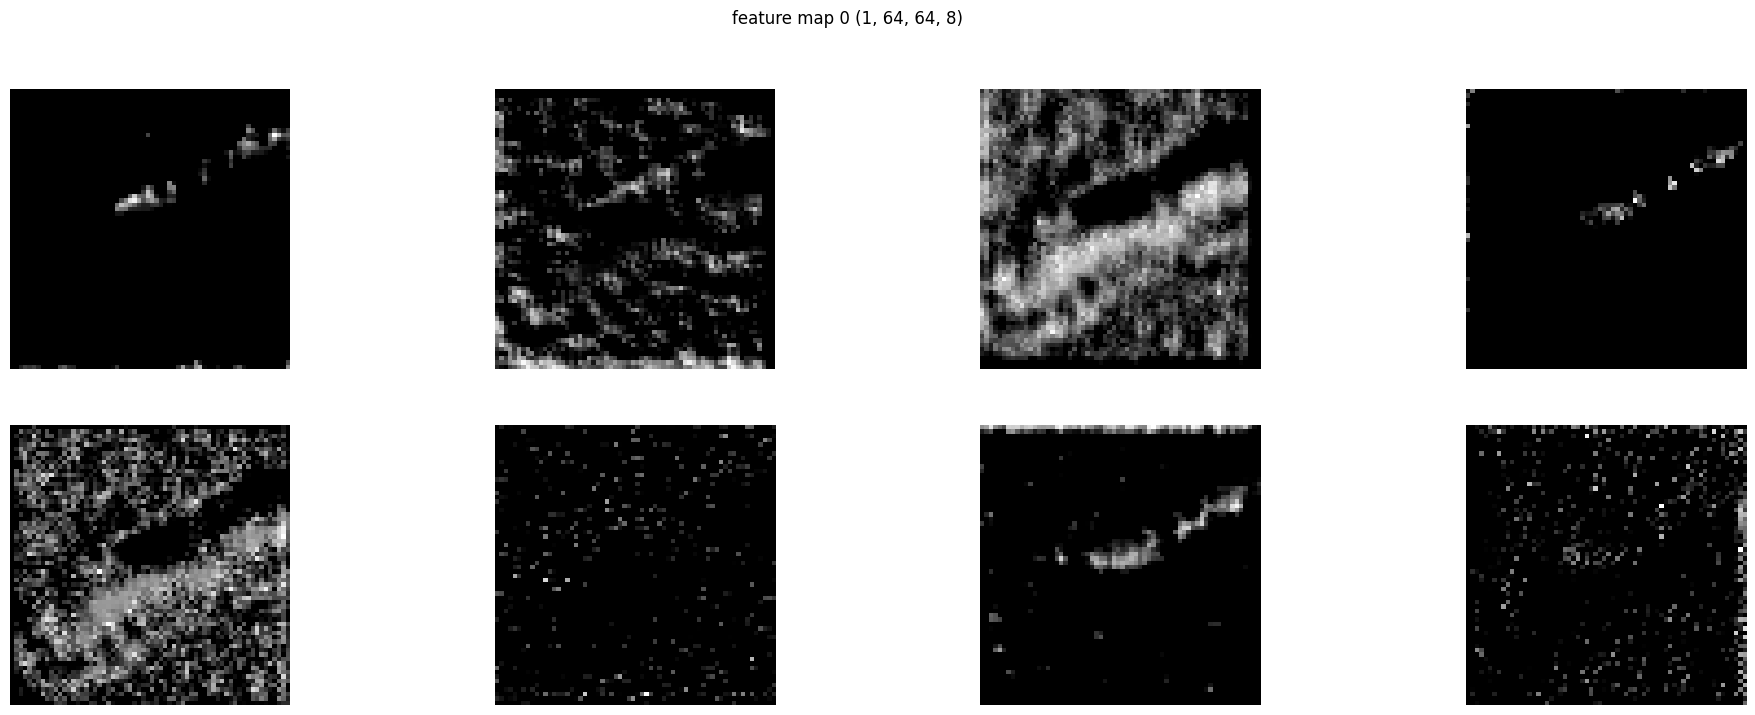

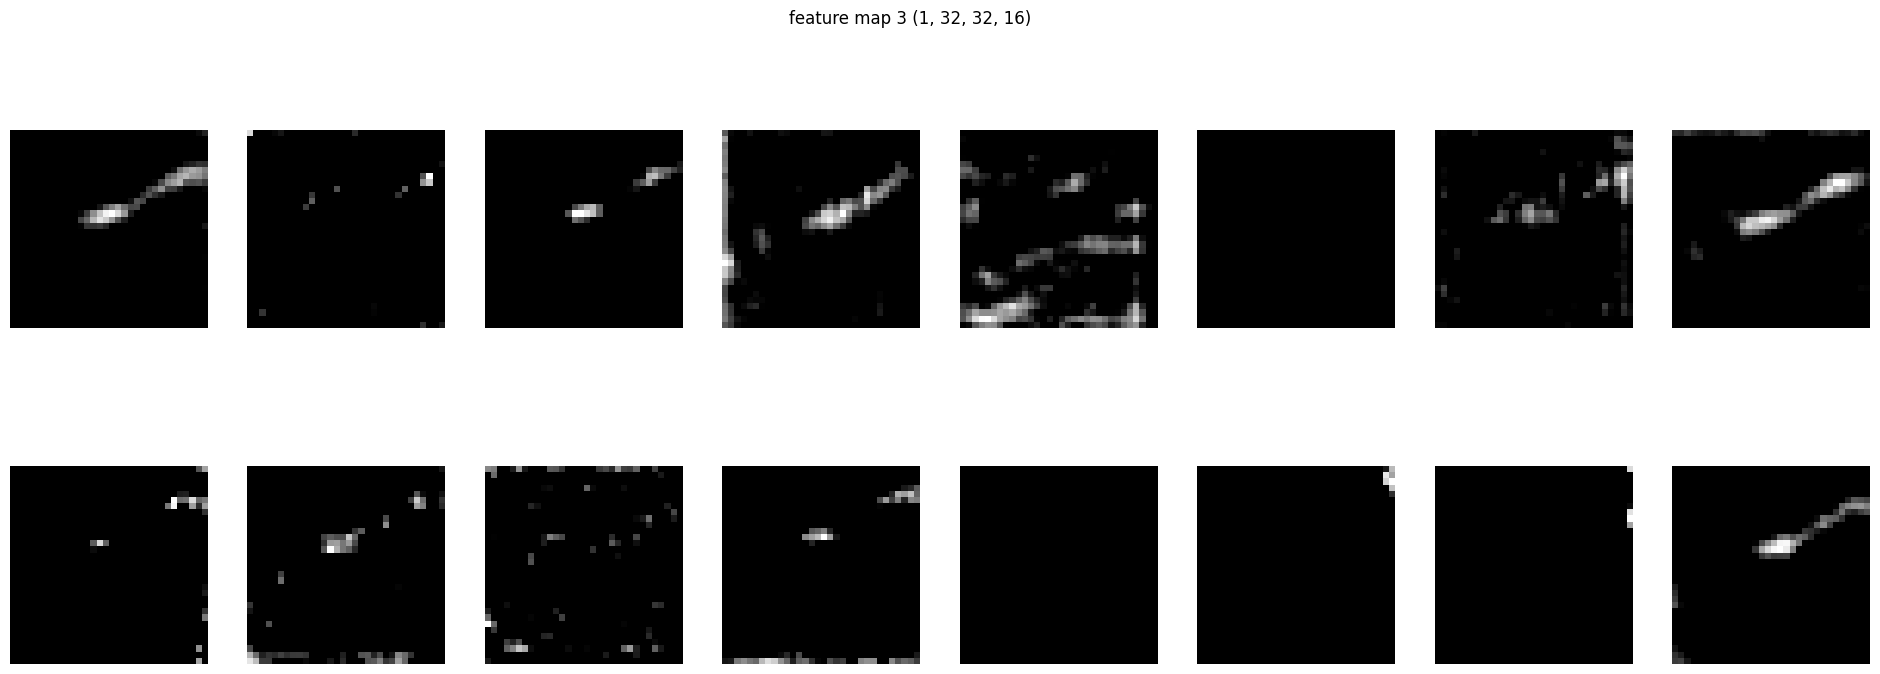

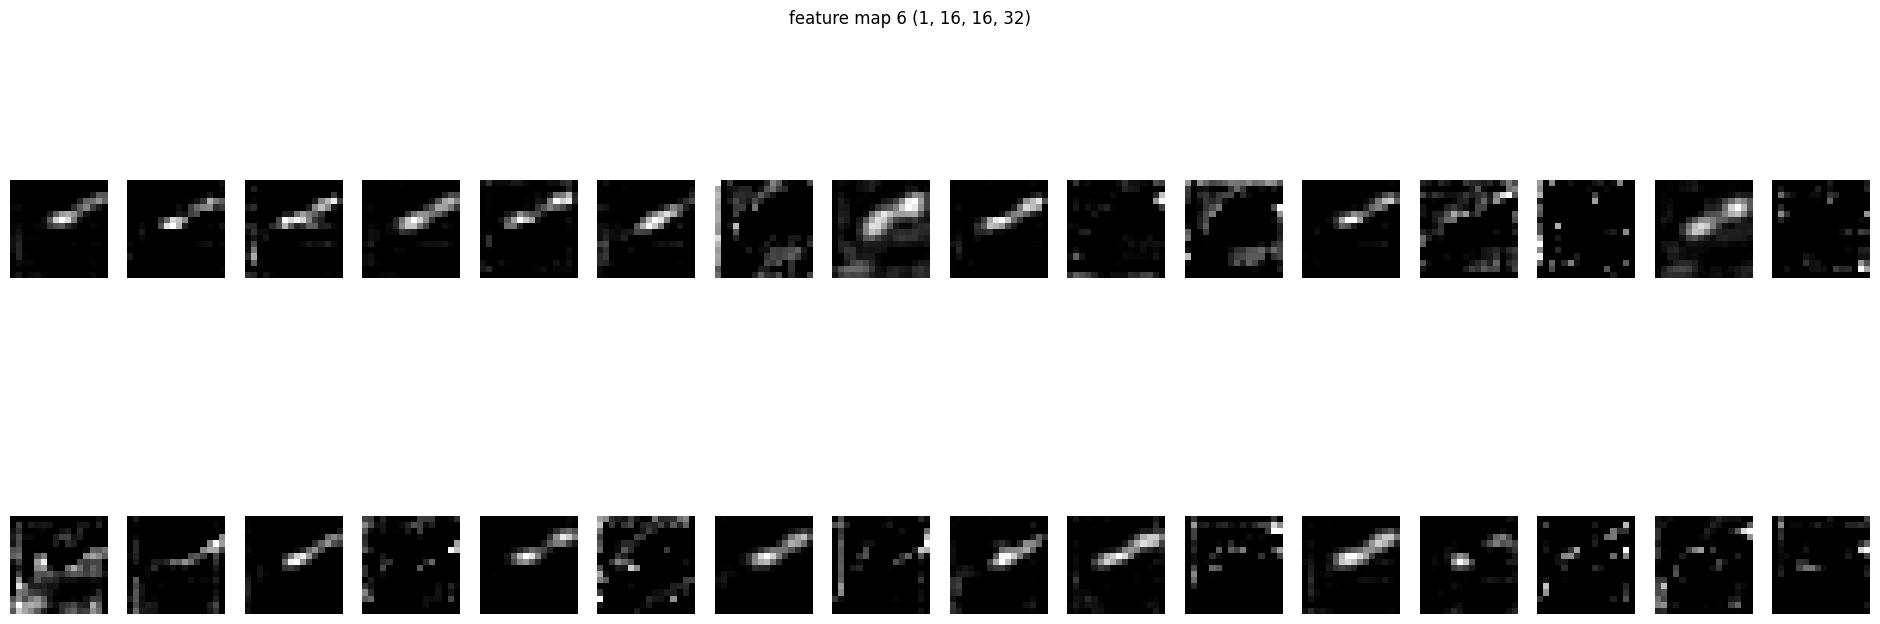

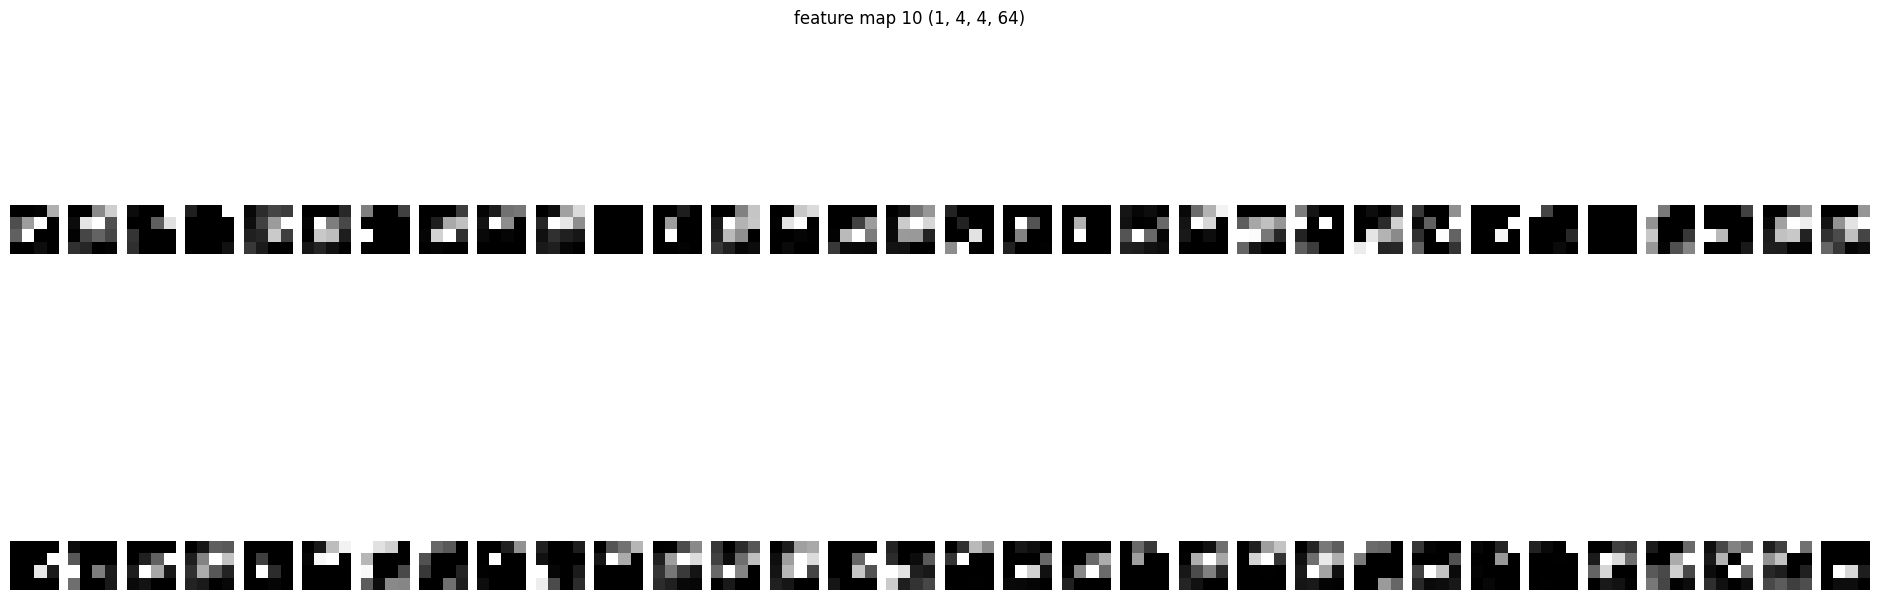

In [0]:
plot_features(layer=0)
plot_features(layer=3)
plot_features(layer=6)
plot_features(layer=10)


#### Convolutional 2D model , filter size=9

In [0]:
#create model
model_cnn = keras.Sequential()
#add model layers

model_cnn.add(Conv2D(8, kernel_size=9, padding='same', activation='relu', input_shape=(64,64,1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Conv2D(16, kernel_size=9, padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Conv2D(32, kernel_size=9, padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add( Dropout(0.2) )

model_cnn.add(Flatten())
model_cnn.add(Dense(units = 16, activation = 'relu'))
model_cnn.add(Dense(3, activation='sigmoid'))

model_cnn.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 64, 64, 8)         656       
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 32, 32, 16)        10384     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 16, 16, 32)      

In [0]:
# keras.utils.plot_model(model_cnn, show_shapes=True, rankdir='TB')

In [0]:
model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


In [0]:
history_cnn = model_cnn.fit(X_train, y_train_onehot, epochs=100, validation_data=(X_val, y_val_onehot))


Epoch 1/100
52/52 [==============================] - 1s 18ms/step - loss: 1.0987 - accuracy: 0.3689 - val_loss: 1.0976 - val_accuracy: 0.3899
Epoch 2/100
52/52 [==============================] - 1s 14ms/step - loss: 1.0974 - accuracy: 0.3677 - val_loss: 1.0967 - val_accuracy: 0.3899
Epoch 3/100
52/52 [==============================] - 1s 13ms/step - loss: 1.0952 - accuracy: 0.3695 - val_loss: 1.0921 - val_accuracy: 0.3899
Epoch 4/100
52/52 [==============================] - 1s 14ms/step - loss: 1.0947 - accuracy: 0.3713 - val_loss: 1.0885 - val_accuracy: 0.3899
Epoch 5/100
52/52 [==============================] - 1s 13ms/step - loss: 1.0748 - accuracy: 0.3689 - val_loss: 1.0959 - val_accuracy: 0.3899
Epoch 6/100
52/52 [==============================] - 1s 13ms/step - loss: 1.0888 - accuracy: 0.3713 - val_loss: 1.0469 - val_accuracy: 0.3899
Epoch 7/100
52/52 [==============================] - 1s 13ms/step - loss: 1.0244 - accuracy: 0.3811 - val_loss: 0.9654 - val_accuracy: 0.4022
Epoch 

In [0]:
model_cnn.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 64, 64, 8)         656       
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 32, 32, 16)        10384     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 16, 16, 32)      

In [0]:
# evaulate model
test_loss, test_acc = model_cnn.evaluate(X_test, y_test_onehot)


38/38 [==============================] - 0s 6ms/step - loss: 0.1421 - accuracy: 0.9668


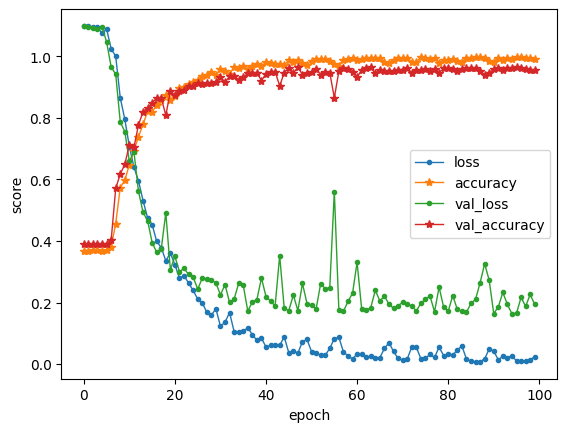

In [0]:
plot_score(history_cnn)

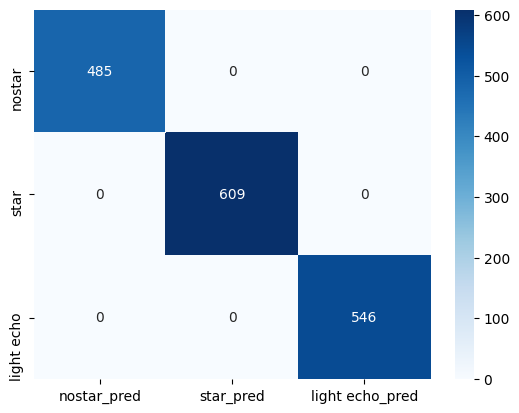

In [0]:
plot_cm(model_cnn, X_train, y_train)

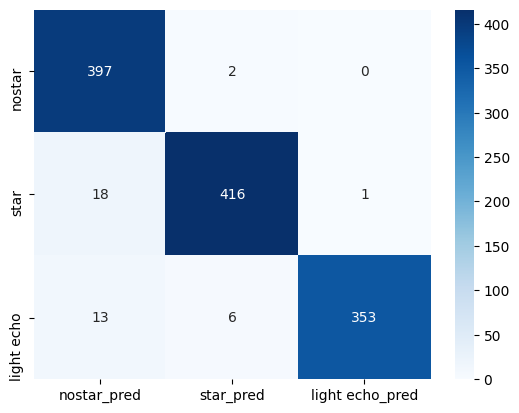

In [0]:
plot_cm(model_cnn, X_test, y_test)

explore model weight

In [0]:
model_cnn.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 64, 64, 8)         656       
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 32, 32, 16)        10384     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 16, 16, 32)      

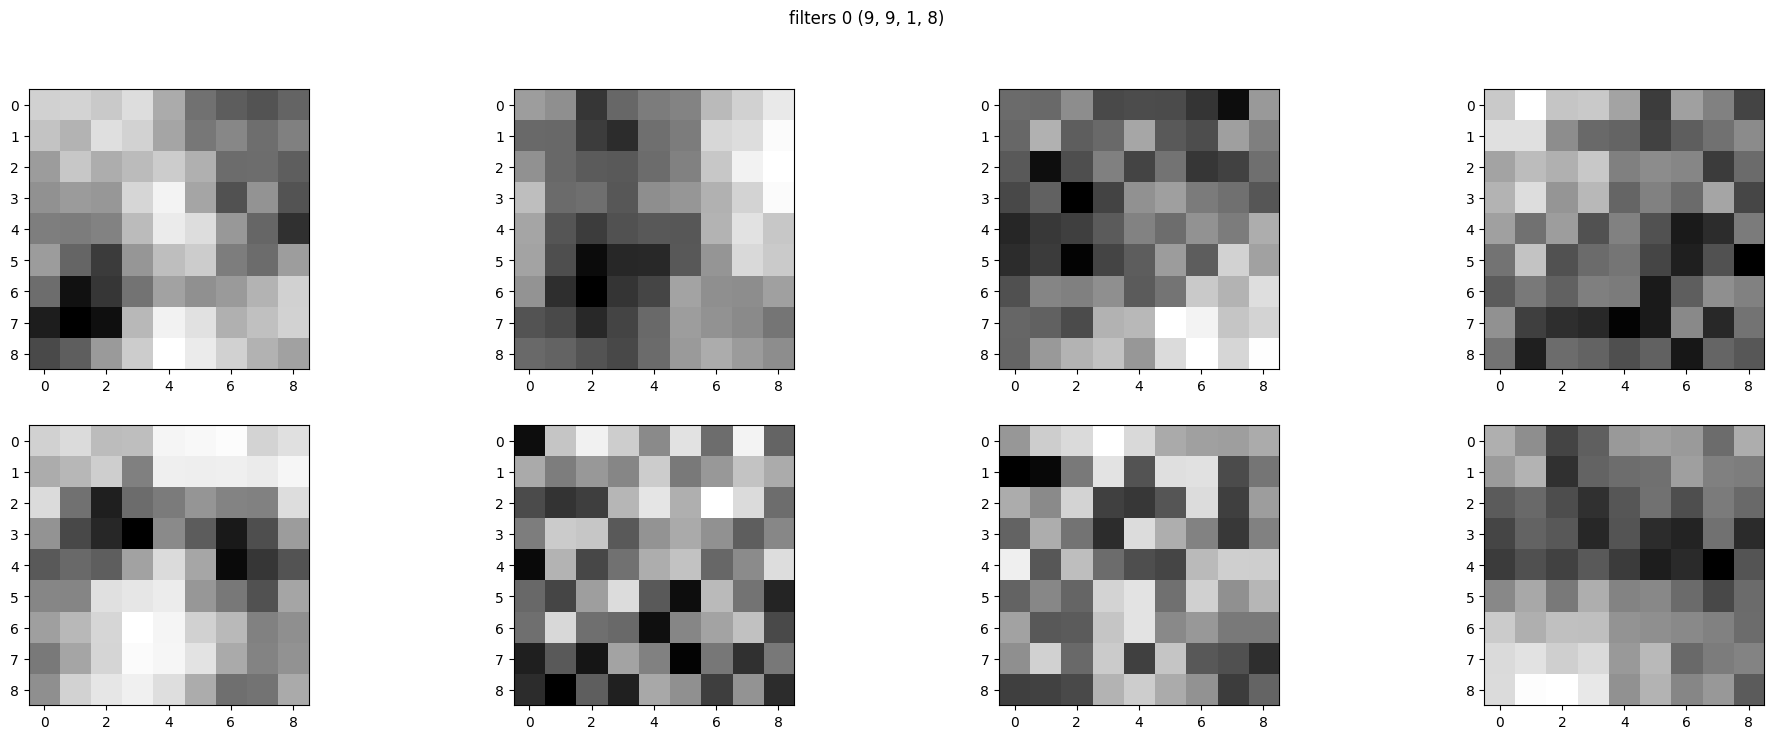

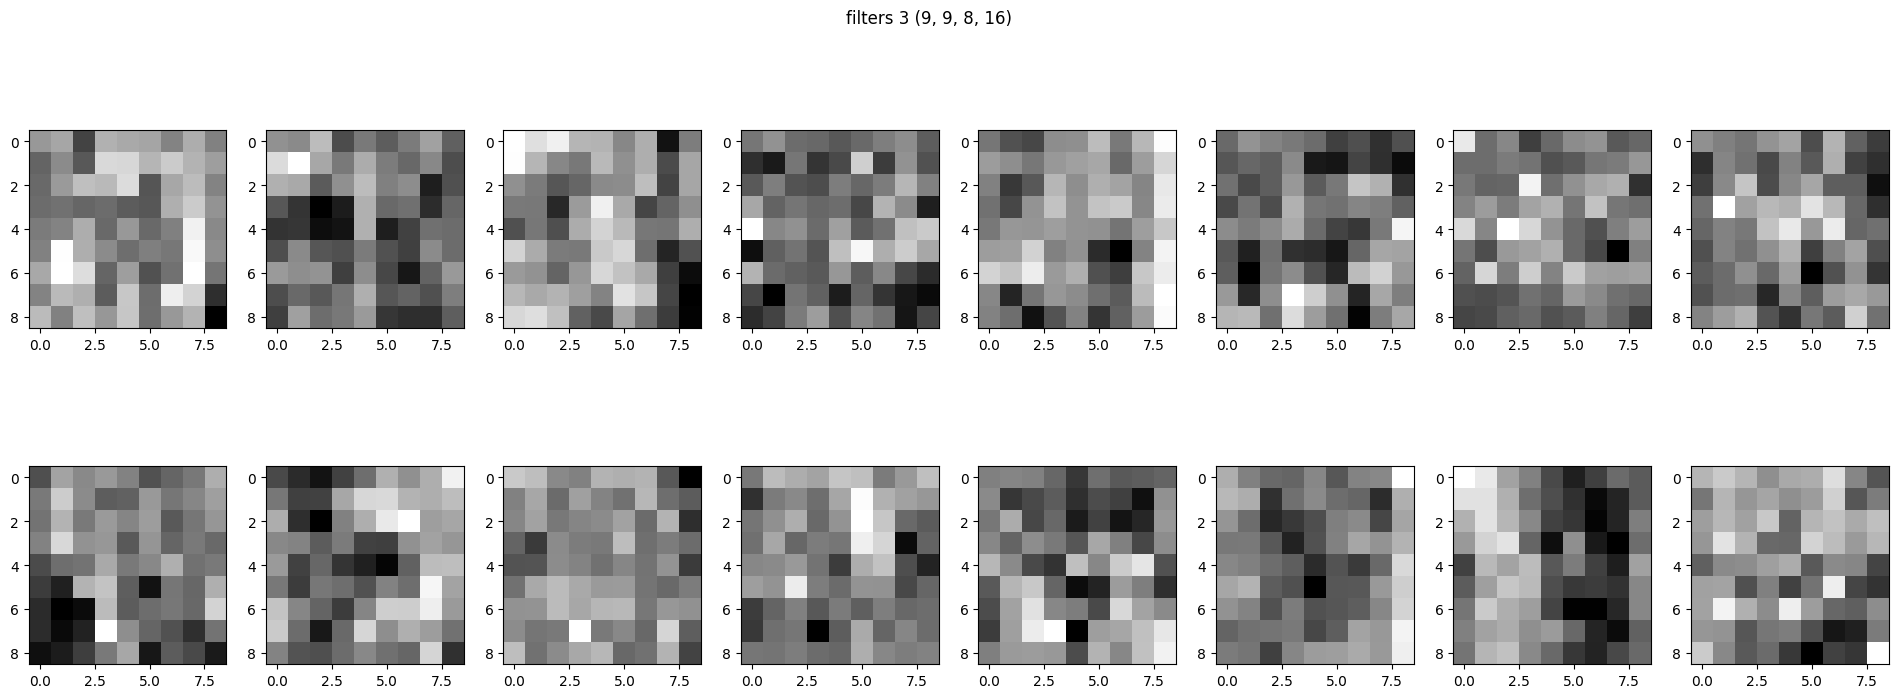

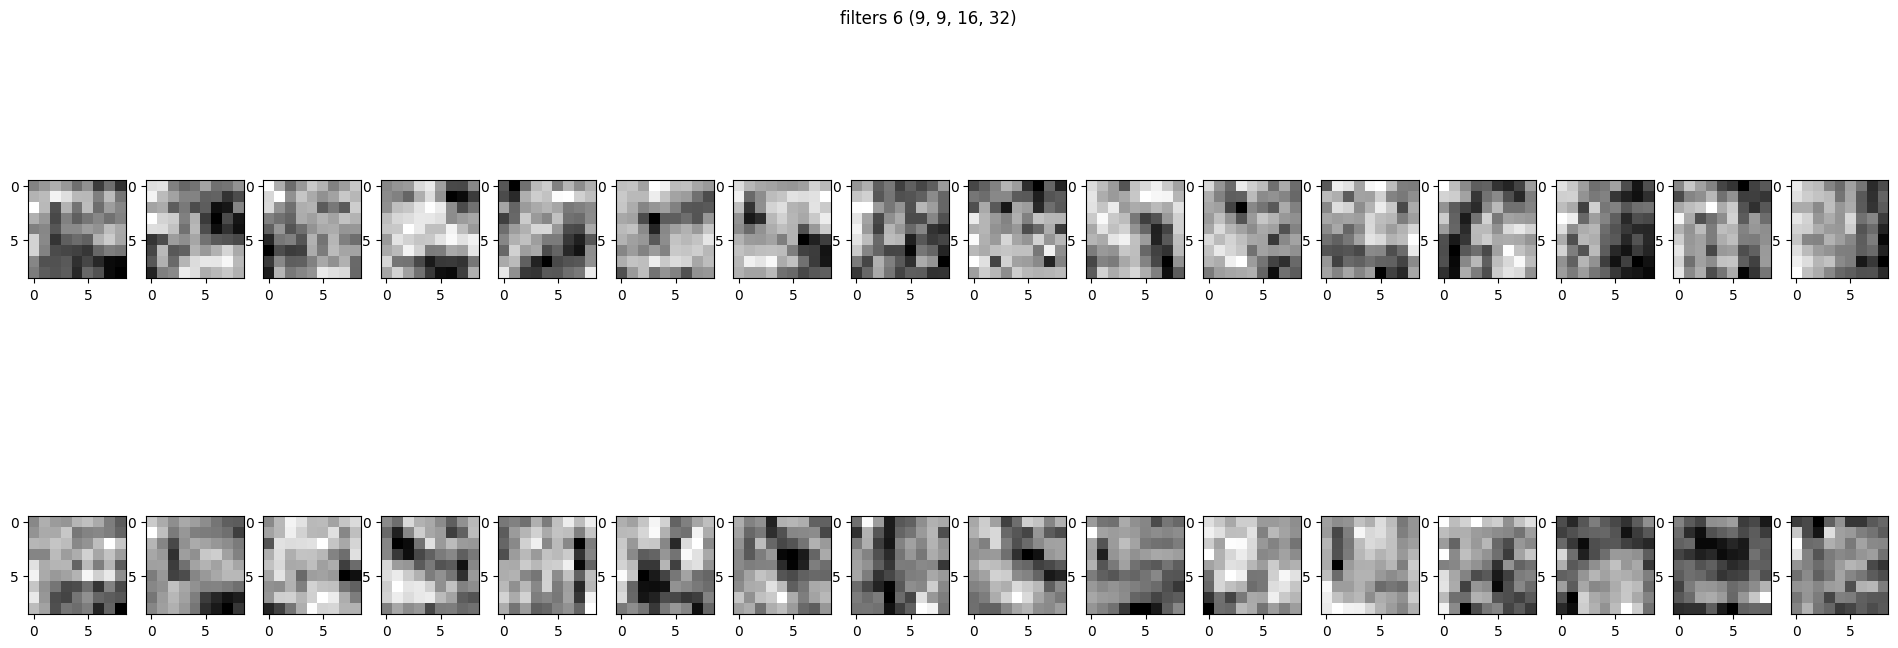

In [0]:
plot_filters(0)
plot_filters(3)
plot_filters(6)


extract features

In [0]:
extractor = keras.Model(inputs=model_cnn.inputs,
                        outputs=[layer.output for layer in model_cnn.layers])


In [0]:
X.shape

(3654, 64, 64)

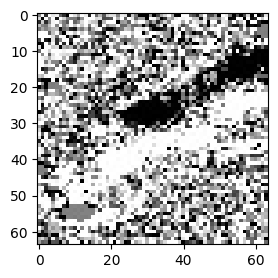

In [0]:
imgidx = 3520
img_ = X[imgidx, :, :]/255
pl.figure(figsize=(3,3))
pl.imshow(img_, cmap='gray')


In [0]:
Y[imgidx]

array([2.])

In [0]:
# predicted
np.argmax( model_cnn.predict(img_.reshape(1, 64, 64, 1)) )

2

In [0]:
features = extractor(img_.reshape(1, 64, 64, 1 ))


In [0]:
for i in range( len(features) ):
    print(i, features[i].numpy().shape)

0 (1, 64, 64, 8)
1 (1, 32, 32, 8)
2 (1, 32, 32, 8)
3 (1, 32, 32, 16)
4 (1, 16, 16, 16)
5 (1, 16, 16, 16)
6 (1, 16, 16, 32)
7 (1, 8, 8, 32)
8 (1, 8, 8, 32)
9 (1, 8, 8, 64)
10 (1, 4, 4, 64)
11 (1, 4, 4, 64)
12 (1, 1024)
13 (1, 16)
14 (1, 3)


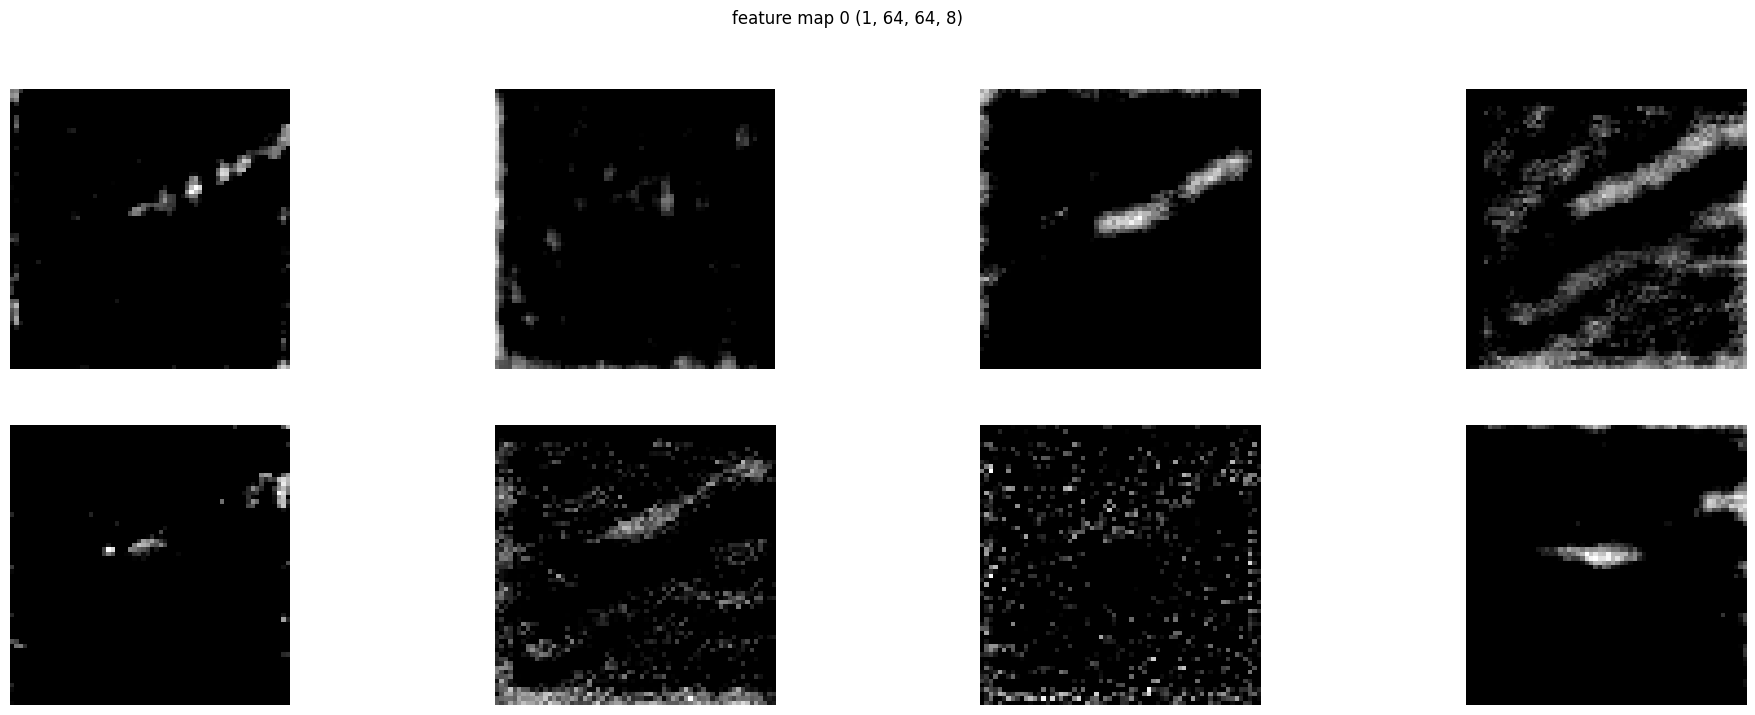

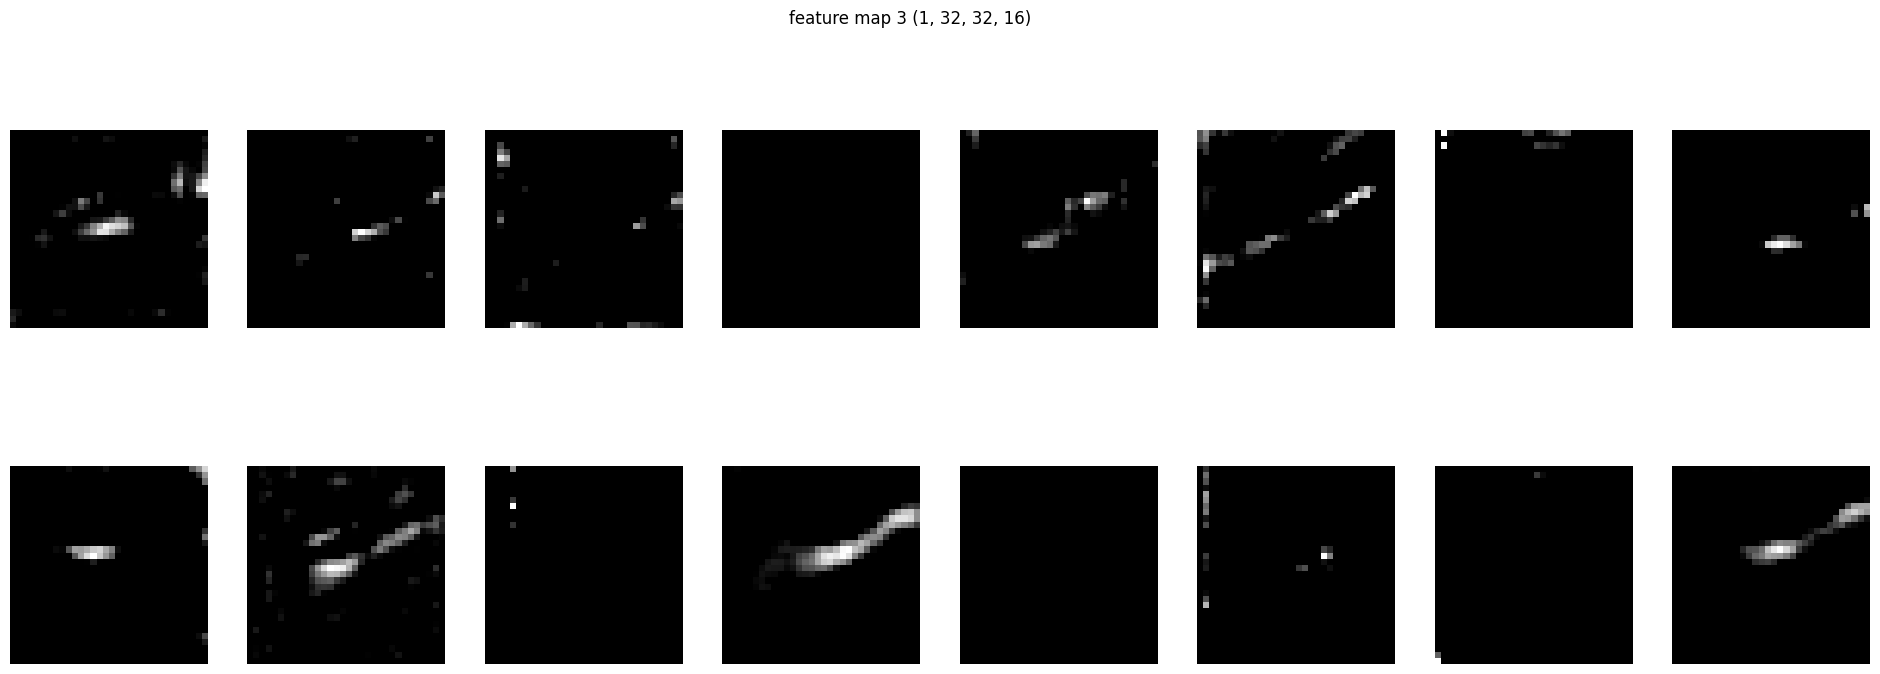

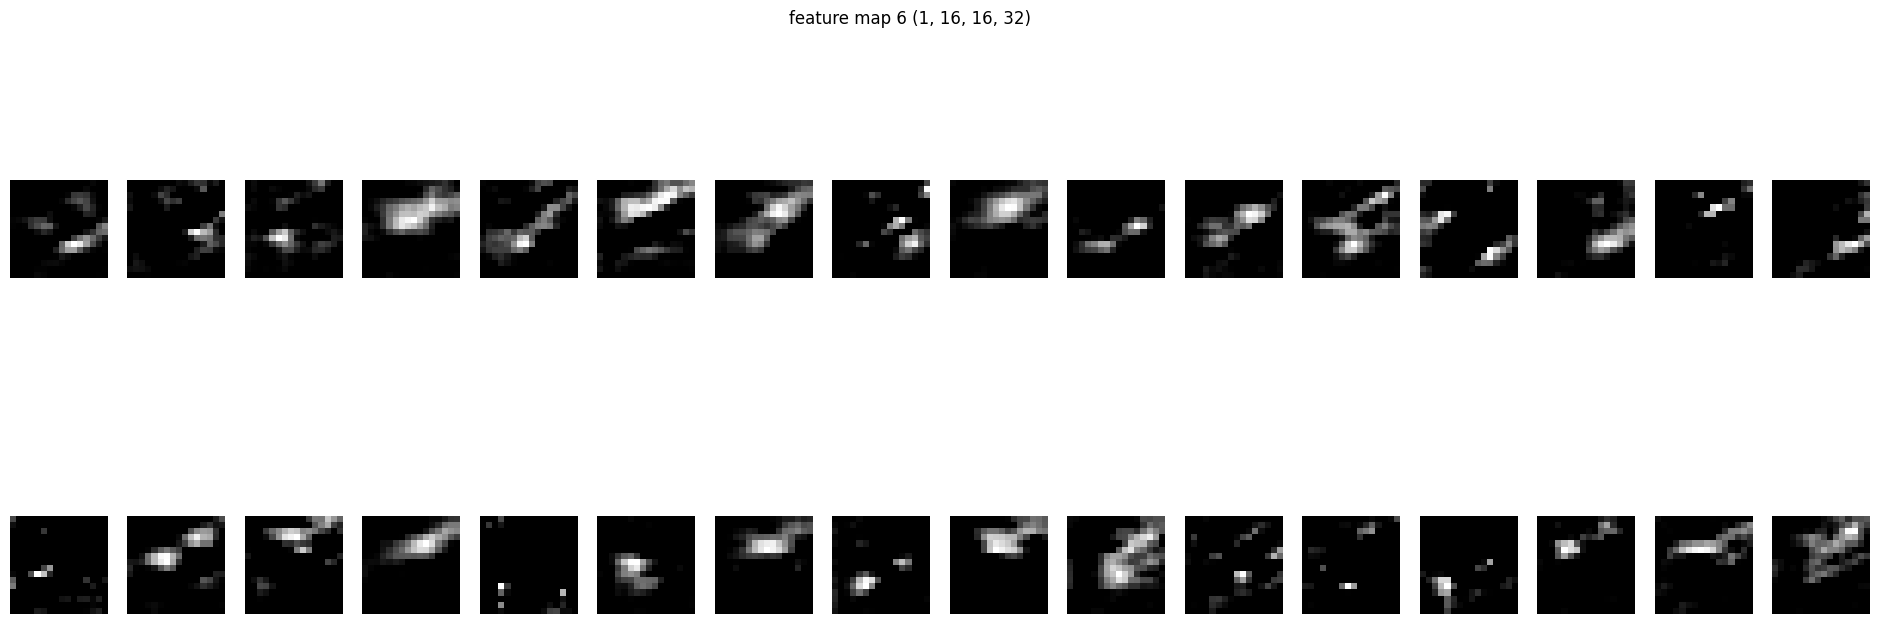

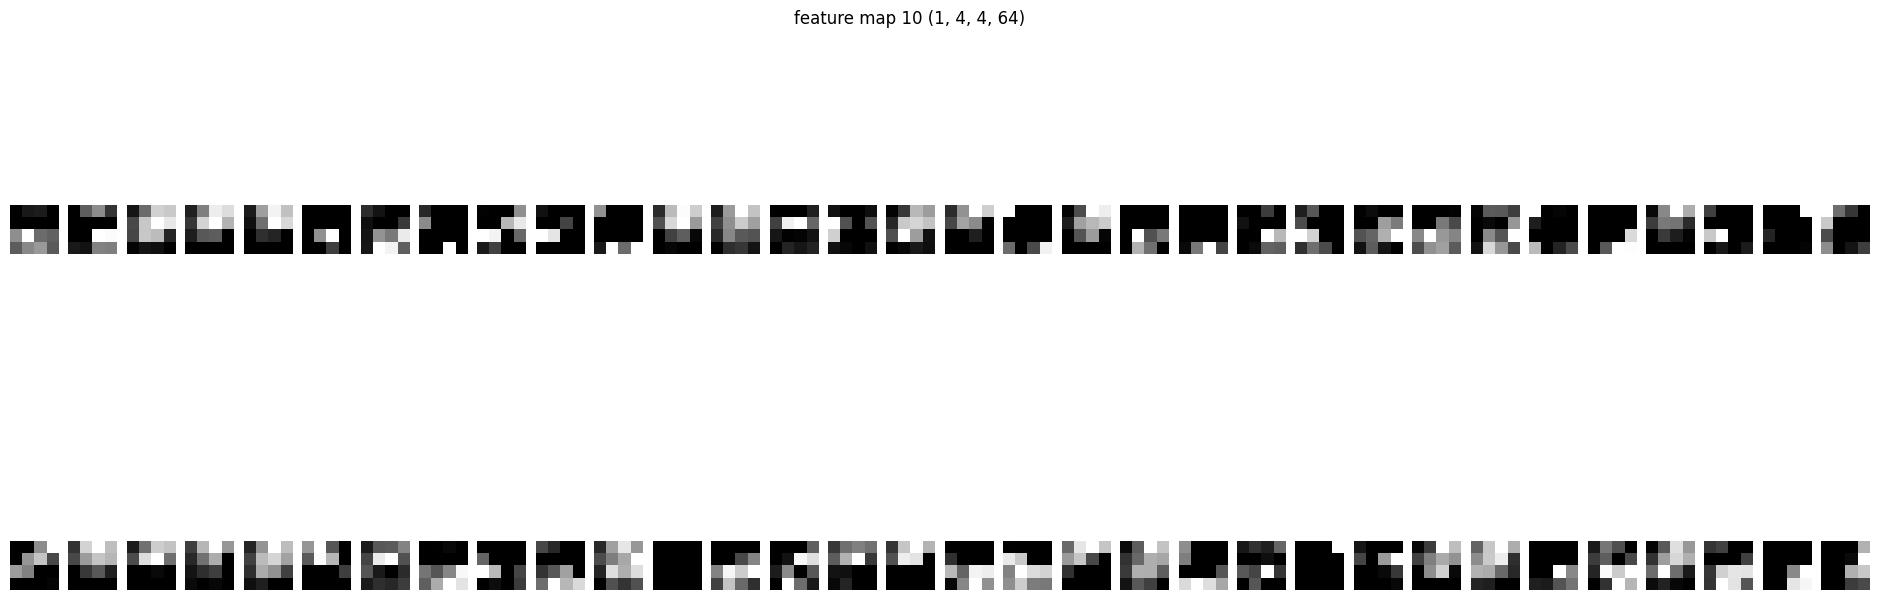

In [0]:
plot_features(layer=0)
plot_features(layer=3)
plot_features(layer=6)
plot_features(layer=10)


#### utils

In [0]:
def plot_filters( layer = 1 ):
    layer_n = model_cnn.layers[layer]
    filters, bias = layer_n.get_weights()  # all filters used in layers

    n_filter = filters.shape[3]
    col = int( n_filter / 2)
    fig, axs = pl.subplots(nrows=2, ncols=col, figsize=(24, 8) )
    axs = axs.ravel()
    for i in range( n_filter ):
        axs[i].imshow( filters [:,:,0, i], cmap='gray')
        axs[i].axis('on')
    fig.suptitle('filters {} {}'.format(layer, filters.shape) )
    

In [0]:
def plot_features( layer = 1 ):
    
    n_filter = features[layer].shape[3]
    col = int( n_filter / 2)
    fig, axs = pl.subplots(nrows=2, ncols=col, figsize=(24, 8) )
    axs = axs.ravel()
    for i in range( n_filter ):
        axs[i].imshow( features[layer].numpy() [0,:,:, i], cmap='gray')
        axs[i].axis('off')
    fig.suptitle('feature map {} {}'.format(layer,features[layer].shape) )


In [0]:
def plot_score(history):
    '''plot loss from keras fit history output'''
    df_history = pd.DataFrame(history.history)
    #pl.style.use('seaborn')

    pl.plot(df_history.loss, '.-', label='loss')
    pl.plot(df_history.accuracy, '*-', label='accuracy')

    if 'val_loss' in df_history.columns:
        pl.plot(df_history.val_loss, '.-', label='val_loss')
        pl.plot(df_history.val_accuracy, '*-', label='val_accuracy')

    pl.xlabel('epoch')
    pl.ylabel('score')
    pl.legend()

In [0]:
from sklearn.metrics import confusion_matrix

def plot_cm(model=model_cnn, X_test=X_test, y_test=y_test):
    
    y_test_pred = model_cnn.predict( X_test )
    y_test_argmax = np.argmax( y_test_pred, axis=1)
    cm = confusion_matrix(y_pred=y_test_argmax, y_true=y_test, ) 

    sn.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
           xticklabels=['nostar_pred', 'star_pred', 'light echo_pred'], 
           yticklabels=['nostar', 'star', 'light echo'])


#### others

predict some GAN generated images

In [0]:
LE_gan = cv2.imread( 'star64/LEs_gan/generated_LE_2_566.png' )

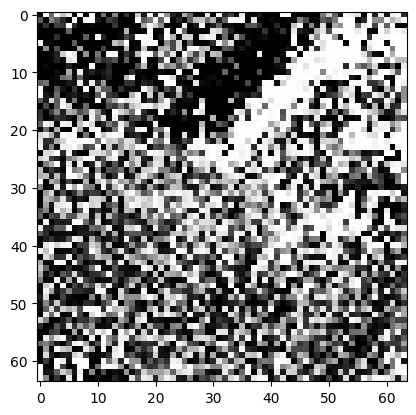

In [0]:
LE_gan = LE_gan / 255
pl.imshow(LE_gan, cmap='gray')

In [0]:
LE_gan.shape

(64, 64, 3)

In [0]:
LE_gan_pred = model_cnn.predict(LE_gan[:,:, 0].reshape(1, 64, 64, 1))
np.argmax(LE_gan_pred)

2

In [0]:
imgfile = 'star64/LEs_gan/generated_LE_2_63.png'
LE_gan = cv2.imread( imgfile ) / 255
LE_gan_pred = model_cnn.predict(LE_gan[:,:, 0].reshape(1, 64, 64, 1))

pl.imshow(imgfile)
pl.title( np.argmax(LE_gan_pred) )


NameError: ignored

### GRAD- CAM

In [0]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap



In [0]:
img_path = 'star64/LEs_gan/generated_LE_2_566.png'
img_size = (64, 64)

In [0]:
preprocess_input = keras.applications.xception.preprocess_input


In [0]:
img_array.shape

(1, 64, 64, 3)

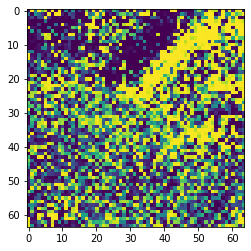

In [0]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

pl.imshow(img_array[0, :, :, 0], cmap='gray')
# Make model
# model = model_builder(weights="imagenet")


In [0]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

In [0]:
last_conv_layer_name = "dropout_3"
classifier_layer_names = [
    "flatten",
    "dense",
    "dense_1"
]


In [0]:
imgarr = img_array[:, :, :, 0].reshape(1, 64, 64, 1)

In [0]:
# Print what the top predicted class is
preds = model_cnn.predict(imgarr)
print("Predicted:", np.argmax(preds) )


Predicted: 2


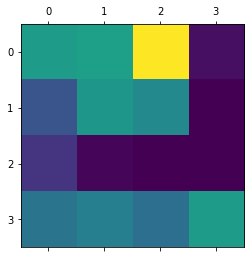

In [0]:


# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    imgarr, model_cnn, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
pl.matshow(heatmap)
pl.show()

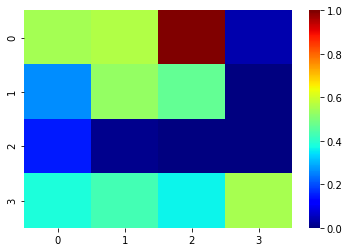

In [0]:
sn.heatmap(heatmap, cmap='jet')

In [0]:
from skimage.transform import rescale

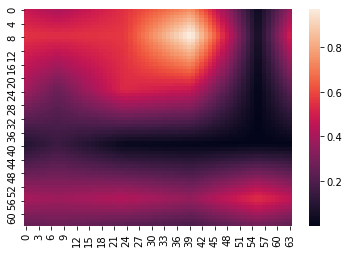

In [0]:
heatmap64 = rescale(heatmap, 16)
sn.heatmap(heatmap64)

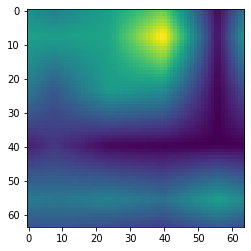

In [0]:
pl.imshow(heatmap64)

In [0]:
imgarr[0, :,:,0].shape

(64, 64)

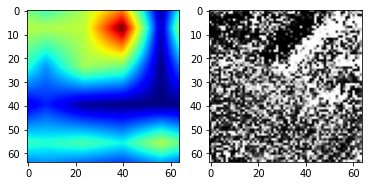

In [0]:
imgLE = imgarr[0, :,:,0]

fig, axs = pl.subplots(1, 2)
axs[0].imshow(heatmap64,  cmap='jet')
axs[1].imshow(imgLE, cmap='gray')

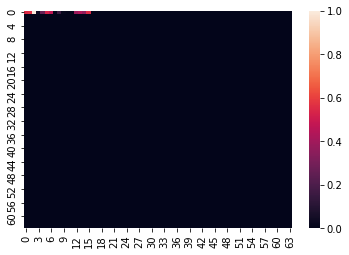

In [0]:
sn.heatmap( heatmap )

In [0]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = pl.cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)


In [0]:
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img.shape

(64, 64, 3)

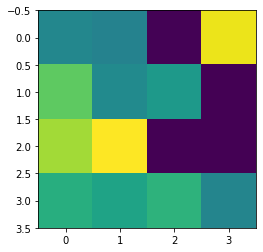

In [0]:
pl.imshow(heatmap)